<a href="https://colab.research.google.com/github/jhaluska10/Keystroke_Dynamics_Analysis/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit

!wget -q https://raw.githubusercontent.com/jhaluska10/kaggle/main/kaggle.json

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download  keystroke-dynamics-challenge-1
! unzip  keystroke-dynamics-challenge-1.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
keystroke-dynamics-challenge-1.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  keystroke-dynamics-challenge-1.zip
replace submit.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# DATA VIEWING 
We took and modified a lot of code from: https://www.kaggle.com/code/arjunsingh88/keystroke-dynamics-with-random-forest. It is to help us visualize our data and helps us view the data of different users to determine whether or not we may or may not want to exclude certain information when training our model (since it is guided training).

In [21]:
keystroke_info = pd.read_csv('train.csv')

In [22]:
for i in range(13):
  if(i != 0):
    keystroke_info['PP-'+str(i)] = keystroke_info['press-'+str(i)] - keystroke_info['press-'+str(i-1)]
    keystroke_info['RP-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i-1)]
    keystroke_info['RR-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['release-'+str(i-1)]
  keystroke_info['HD-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i)]

#MAY WANT TO ADD DIGRapHS laTER. AM UNSURE AS OF NOW'
Latency_metric = ['HD', 'PP' , 'RR' , 'RP', 'DG', 'TG']
#Latency_metric = [ 'PP' , 'RR' , 'RP']
 
for i in range(1,13):
    keystroke_info['DG-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i-1)]

for i in range(2,13):
    keystroke_info['TG-'+str(i)] = keystroke_info['release-'+str(i)] - keystroke_info['press-'+str(i-2)]
keystroke_info["united_latency"] =   keystroke_info['release-5'] - keystroke_info['press-0']
keystroke_info["states_latency"] =   keystroke_info['release-12'] - keystroke_info['press-7']
for val in Latency_metric:
        lists = [col for col in keystroke_info.columns if val in str(col)]
        keystroke_info[str(val)+'-mean'] = keystroke_info[lists].mean(axis=1)
        keystroke_info[str(val)+'-std'] = keystroke_info[lists].std(axis=1)

keystroke_info


user  press-0  release-0  press-1  release-1  press-2  release-2  \
0       1        0        120      216        312      424        496   
1       1        0         95      168        265      360        455   
2       1        0         71      143        231      783        903   
3       1        0         95      144        263      353        431   
4       1        0         70      166        238      310        406   
..    ...      ...        ...      ...        ...      ...        ...   
875   110        0         80      225        306      444        465   
876   110        0         81      217        289      387        473   
877   110        0         79      216        300      393        519   
878   110        0         84      200        290      384        476   
879   110        0         64      271        366      424        510   

     press-3  release-3  press-4  ...     PP-mean      PP-std     RR-mean  \
0        592        664      808  ...  229.333333   63.115094  225.333333   
1        527        599      736  ...  185.916667   36.412931  182.000000   
2       1087       1159     1351  ...  239.250000  136.361235  237.916667   
3        760        832     1159  ...  331.916667  368.330498  330.000000   
4        526        598      710  ...  173.833333   47.510445  176.000000   
..       ...        ...      ...  ...         ...         ...         ...   
875      575        672      689  ...  190.333333   89.469480  202.000000   
876      954       1057     1091  ...  213.416667  116.619395  218.583333   
877      692        807      807  ...  191.916667   54.841024  197.500000   
878      782        930      943  ...  181.166667   84.555343  186.250000   
879      703        798      827  ...  183.250000   54.359285  191.166667   

         RR-std     RP-mean      RP-std     DG-mean      DG-std     TG-mean  \
0     73.069498  297.333333   70.144440  297.333333   70.144440  530.909091   
1     40.174619  254.250000   34.179007  254.250000   34.179007  438.636364   
2    145.322499  320.333333  147.794288  320.333333  147.794288  572.000000   
3    353.436377  402.000000  359.600030  402.000000  359.600030  761.454545   
4     39.874804  249.000000   39.664502  249.000000   39.664502  425.090909   
..          ...         ...         ...         ...         ...         ...   
875  101.799268  304.250000  107.750659  304.250000  107.750659  491.090909   
876  128.481664  318.333333  119.478666  318.333333  119.478666  534.727273   
877   73.933016  319.250000   62.063201  319.250000   62.063201  507.181818   
878  106.248529  291.416667   95.287563  291.416667   95.287563  468.272727   
879   70.345683  296.583333   57.569655  296.583333   57.569655  471.272727   

         TG-std  
0     96.018180  
1     54.922259  
2    210.607692  
3    484.577417  
4     68.778564  
..          ...  
875  124.353090  
876  150.067379  
877   51.656206  
878  111.498064  
879   44.506384  

[880 rows x 113 columns]

In [23]:
noOfUsers = 10
visual_table = keystroke_info.sort_values(by='user').reset_index(drop=True)[:noOfUsers*8]
visual_table

user  press-0  release-0  press-1  release-1  press-2  release-2  press-3  \
0      1        0        120      216        312      424        496      592   
1      1        0         95      168        265      360        455      527   
2      1        0         71      143        231      783        903     1087   
3      1        0         95      144        263      353        431      760   
4      1        0         70      166        238      310        406      526   
..   ...      ...        ...      ...        ...      ...        ...      ...   
75    10        0         72      216        264      412        458      568   
76    10        0         72      192        265      376        448      521   
77    10        0         71      184        255      375        447      711   
78    10        0         47      184        255      727        776      872   
79    10        0         48      184        234      400        448      592   

    release-3  press-4  ...     PP-mean      PP-std     RR-mean      RR-std  \
0         664      808  ...  229.333333   63.115094  225.333333   73.069498   
1         599      736  ...  185.916667   36.412931  182.000000   40.174619   
2        1159     1351  ...  239.250000  136.361235  237.916667  145.322499   
3         832     1159  ...  331.916667  368.330498  330.000000  353.436377   
4         598      710  ...  173.833333   47.510445  176.000000   39.874804   
..        ...      ...  ...         ...         ...         ...         ...   
75        664      640  ...  138.666667   53.656031  136.583333   50.946422   
76        596      736  ...  162.000000   81.924577  164.000000   63.876301   
77        807      967  ...  199.333333   73.538281  199.333333   89.936678   
78        970     1184  ...  246.666667  172.964701  250.750000  160.658376   
79        664      851  ...  191.416667  153.180499  195.333333  151.118456   

       RP-mean      RP-std     DG-mean      DG-std     TG-mean      TG-std  
0   297.333333   70.144440  297.333333   70.144440  530.909091   96.018180  
1   254.250000   34.179007  254.250000   34.179007  438.636364   54.922259  
2   320.333333  147.794288  320.333333  147.794288  572.000000  210.607692  
3   402.000000  359.600030  402.000000  359.600030  761.454545  484.577417  
4   249.000000   39.664502  249.000000   39.664502  425.090909   68.778564  
..         ...         ...         ...         ...         ...         ...  
75  210.166667   53.903674  210.166667   53.903674  350.090909   78.640263  
76  238.416667   79.450909  238.416667   79.450909  410.545455  117.719466  
77  287.250000   79.479128  287.250000   79.479128  501.000000  126.054750  
78  325.750000  166.499863  325.750000  166.499863  596.818182  226.838188  
79  271.000000  146.760163  271.000000  146.760163  476.636364  214.532176  

[80 rows x 113 columns]

In [24]:
visual_table["RR-1"]

0     192
1     170
2     160
3     168
4     168
     ... 
75    192
76    193
77    184
78    208
79    186
Name: RR-1, Length: 80, dtype: int64

# Swarm Plots

These plots show how spread out the latency for the first 10 users to give an idea about how much variation is in a users key presses. However, it is hard to differentiate between each attempt.

HD


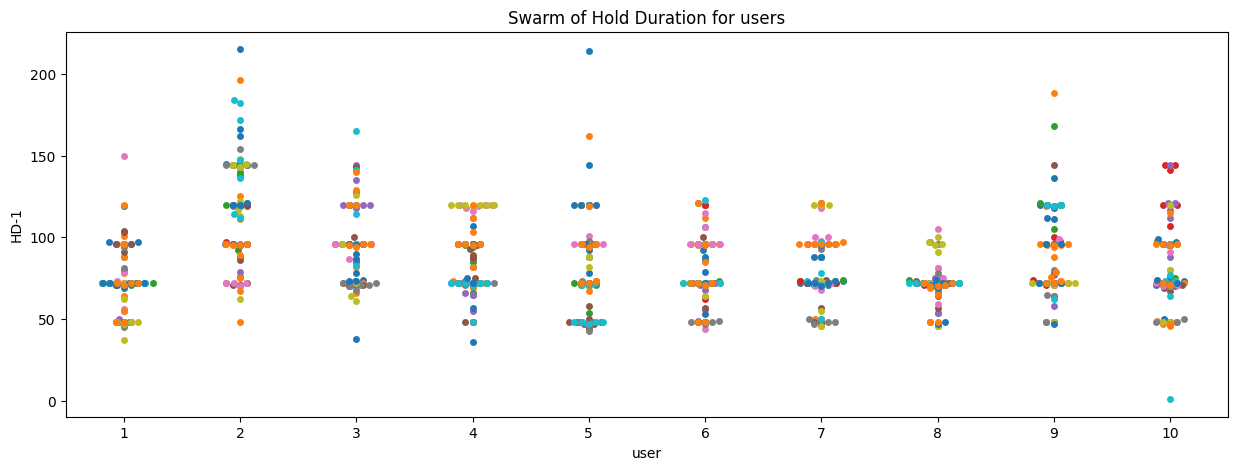

PP


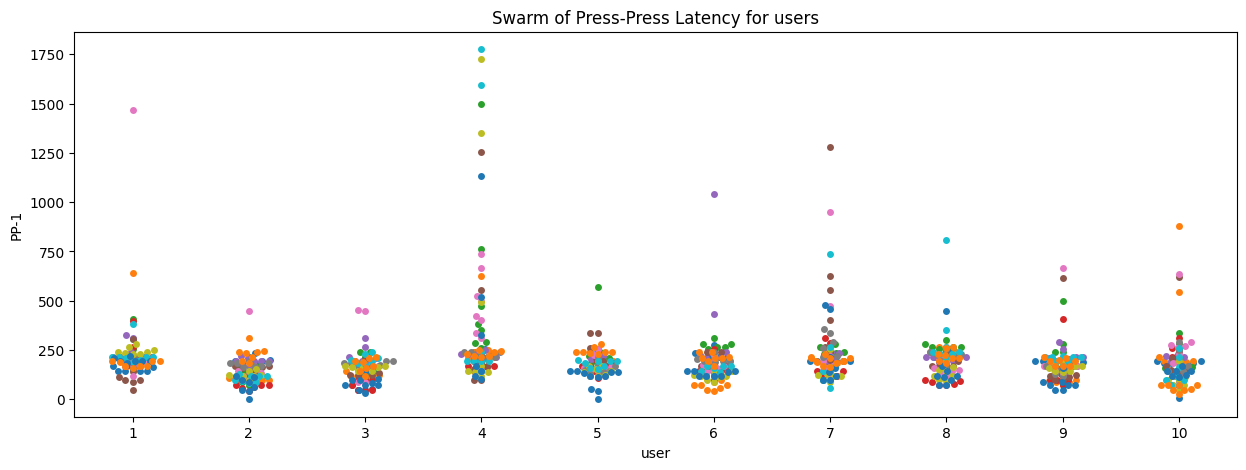

RR


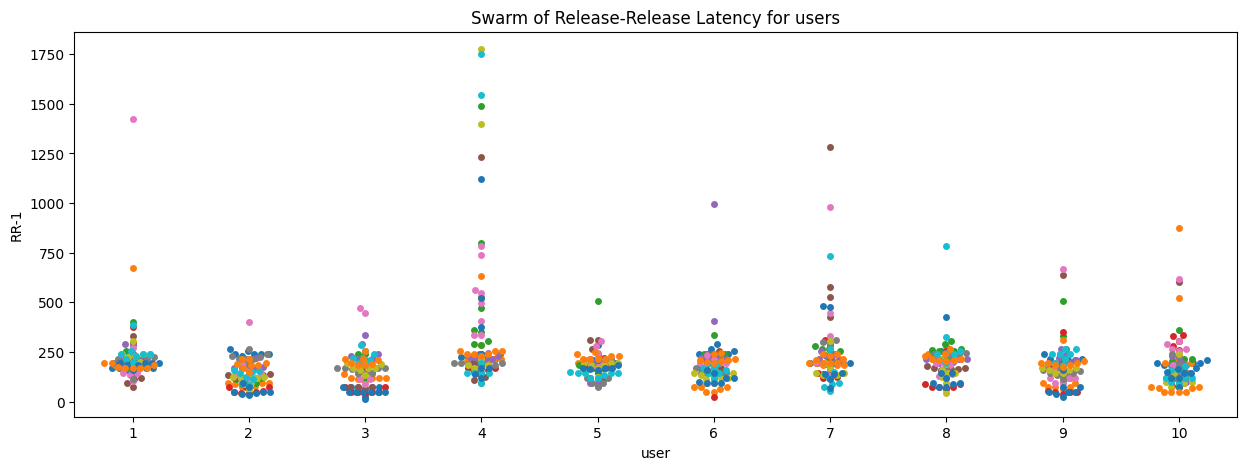

RP


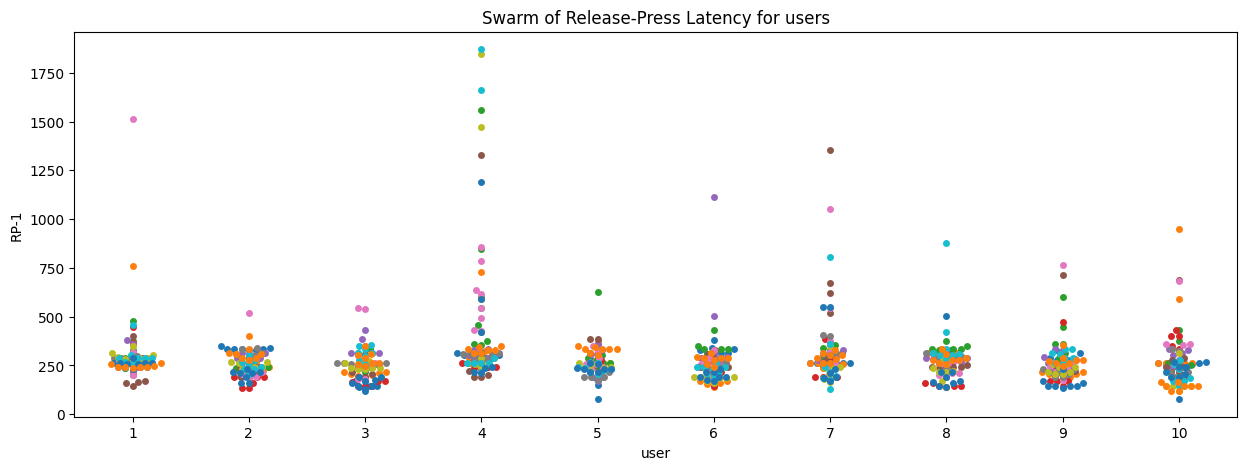

In [25]:
Latency_metric = {'HD':'Hold Duration', 'PP':'Press-Press Latency' , 'RR':'Release-Release Latency' , 'RP':'Release-Press Latency'}
# A loop that iterates over the dictionary.
for val in Latency_metric:
    print(val)
    plt.figure(figsize=(15,5))
    for i in range(1,13):
        sns.swarmplot(y=val+'-'+str(i),x='user',data=visual_table).set_title('Swarm of {} for users'.format(Latency_metric[val]))
    plt.show()

In [26]:
li = []
def plot_signal(user):

    uids = ','.join(str(user) for user in user['user'].unique())
    user_id = ','.join(['user',uids])
    user = user.iloc[:,1:]
    user.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(25,10))
    
    for i in range(len(user)):
        d = 'Data'+str(i+1)
        li.append(d)
    #print(li)
    for i in range(len(user)):
        title = 'Keystroke signal of user ' + str(uids)
        plt.title(title, fontsize=15)
        plt.xlabel('values')
        plt.ylabel('intensity')
        plt.plot(user.iloc[i,:-1])
        plt.legend(li)
    plt.show()

# Signal Plots
Thes plots show each of a users 8 different attempts and their different latenies across all the key presses. It helps visualize the variation between the different entries a user has. We plot the first 3 users for each of the latency metrics.

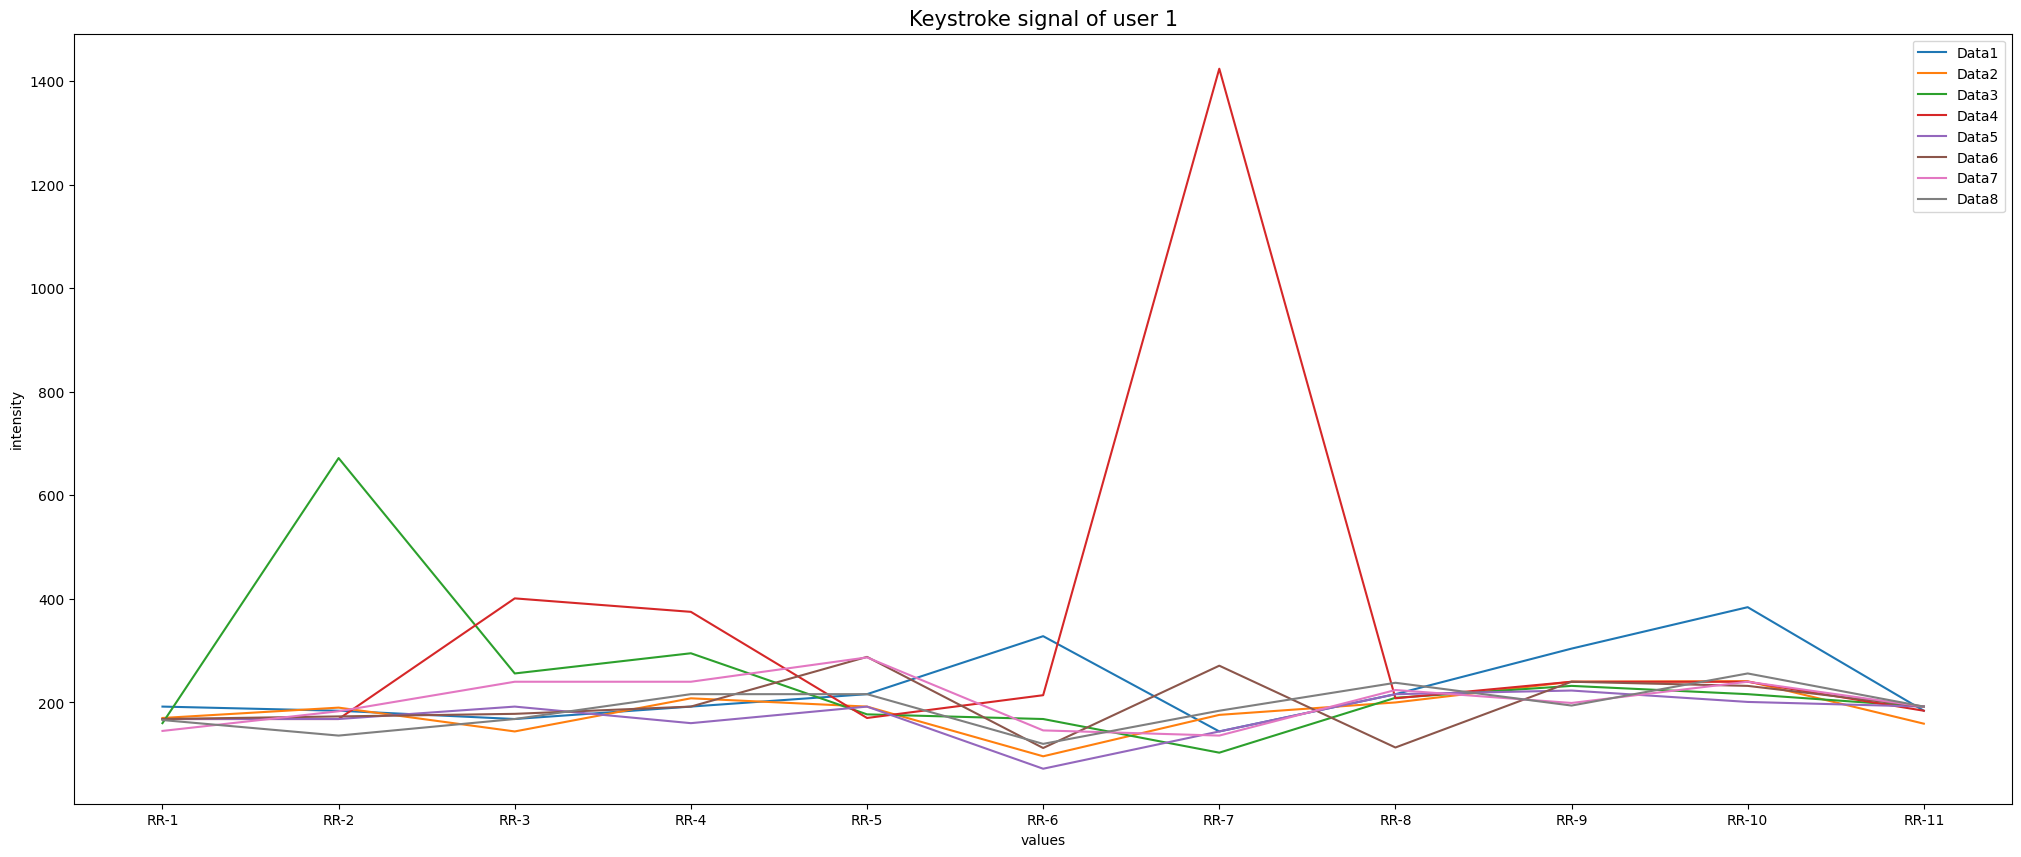

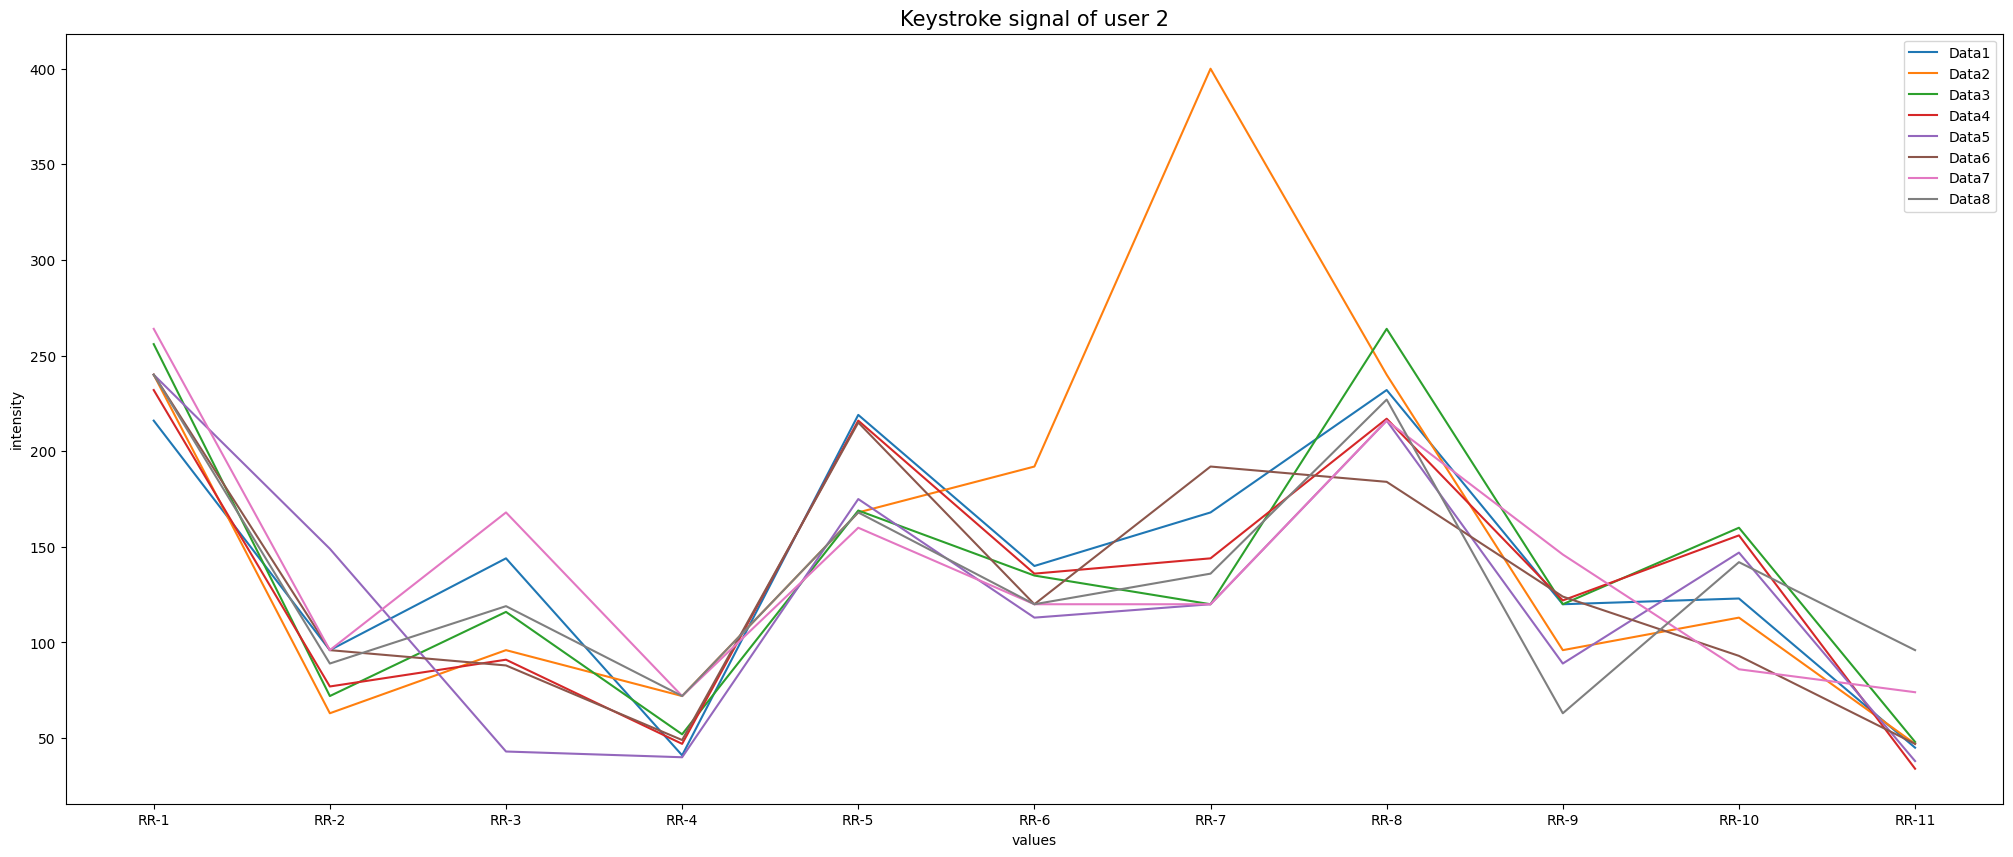

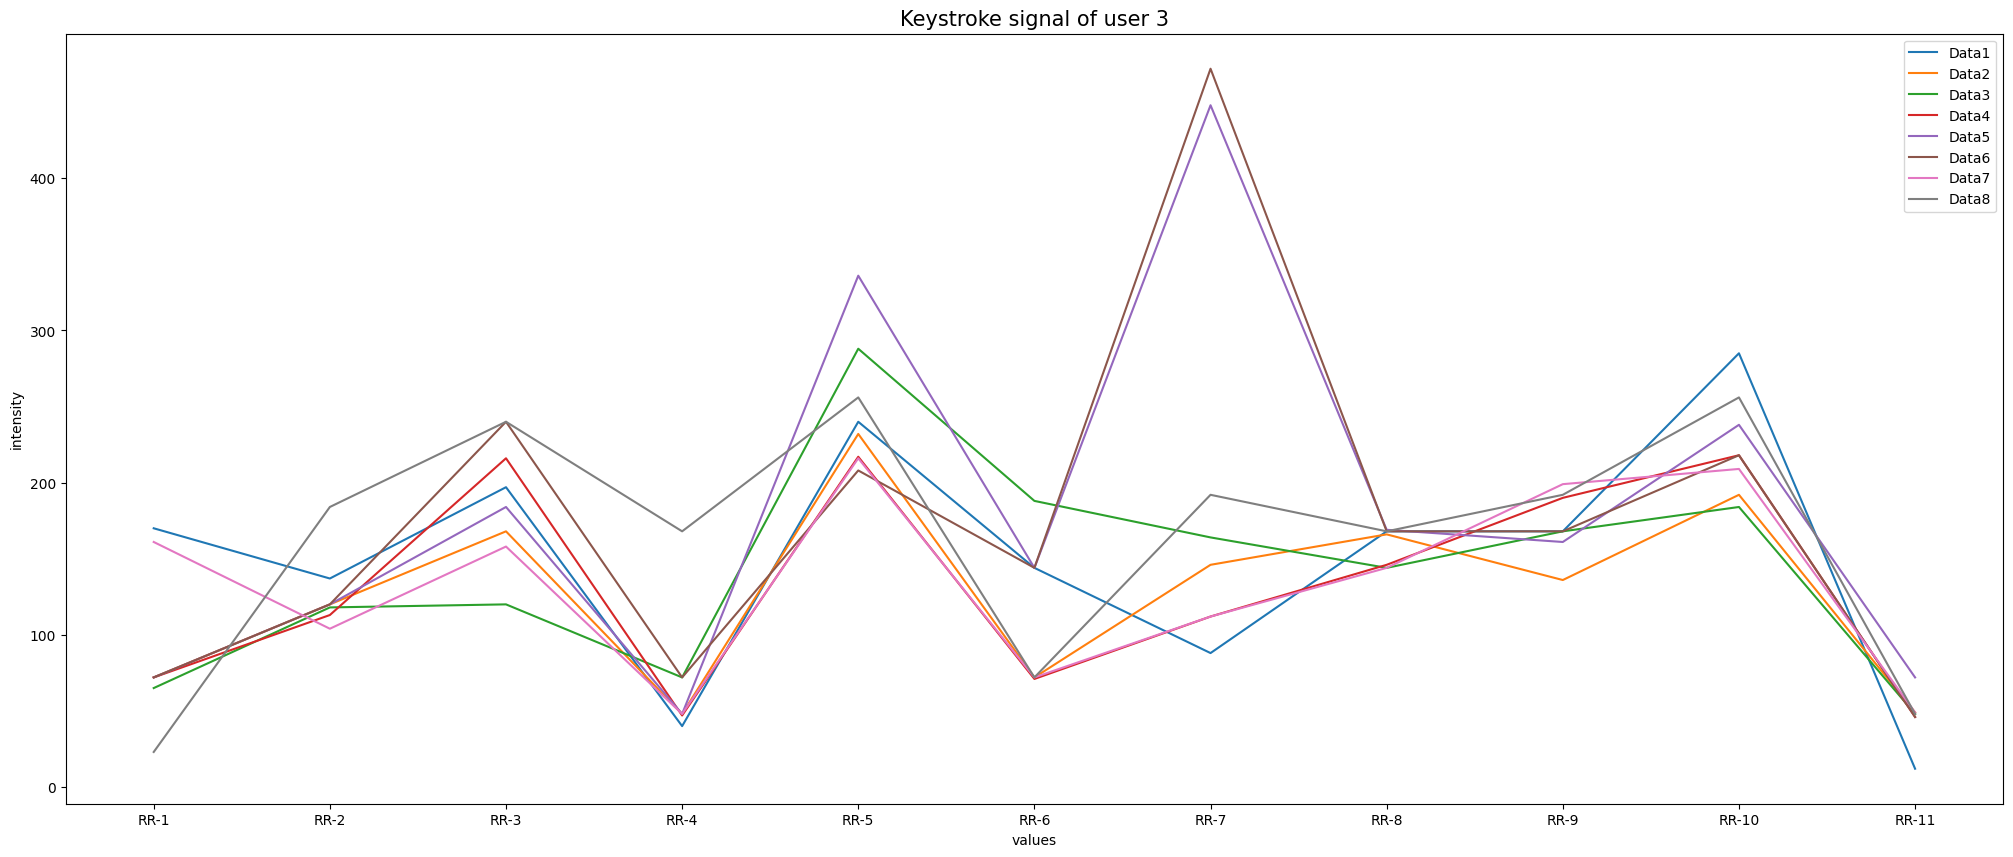

In [27]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['RR','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

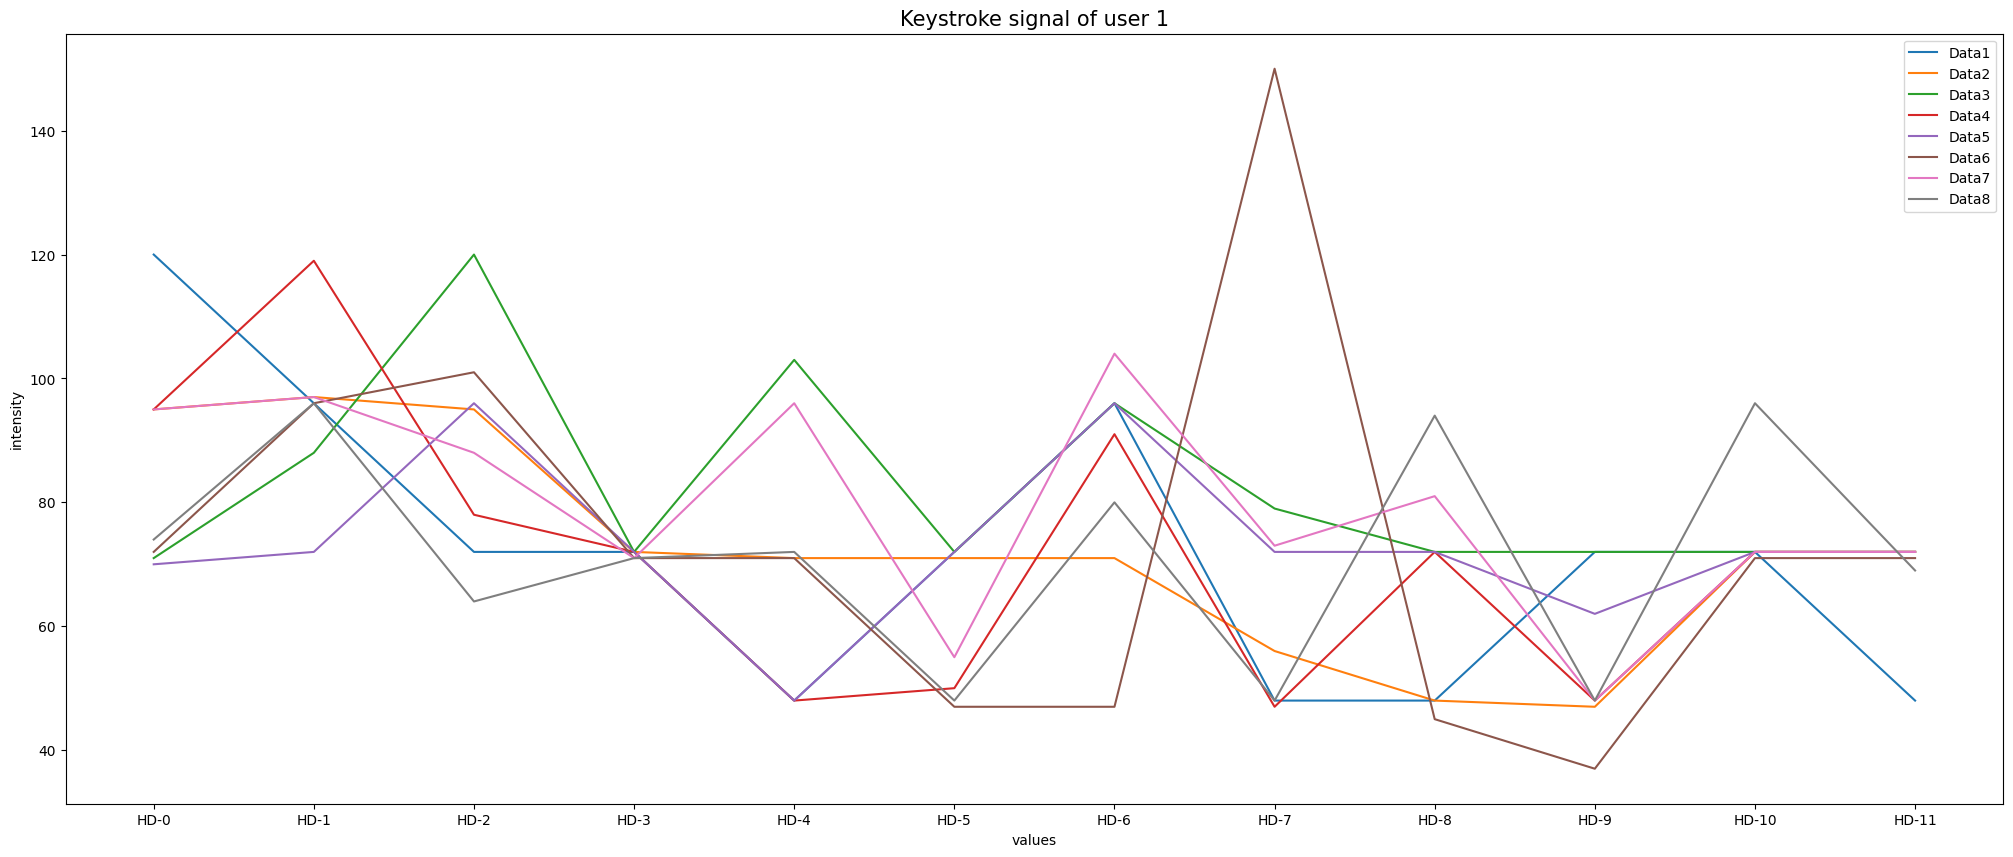

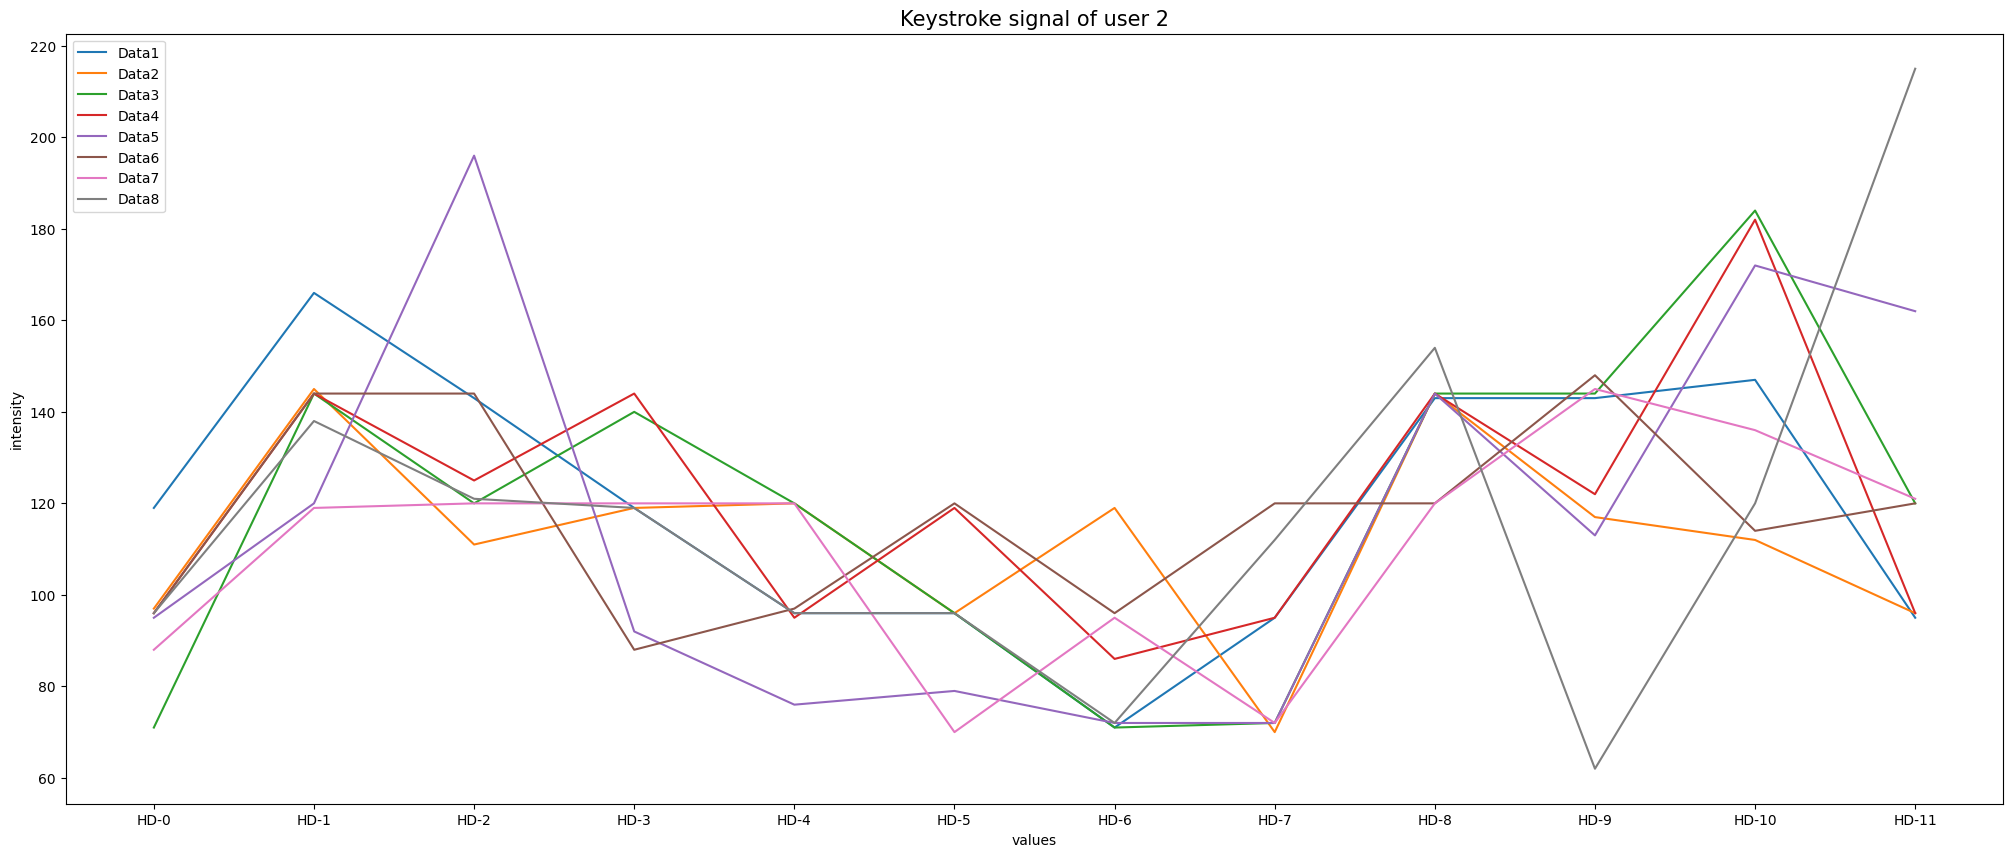

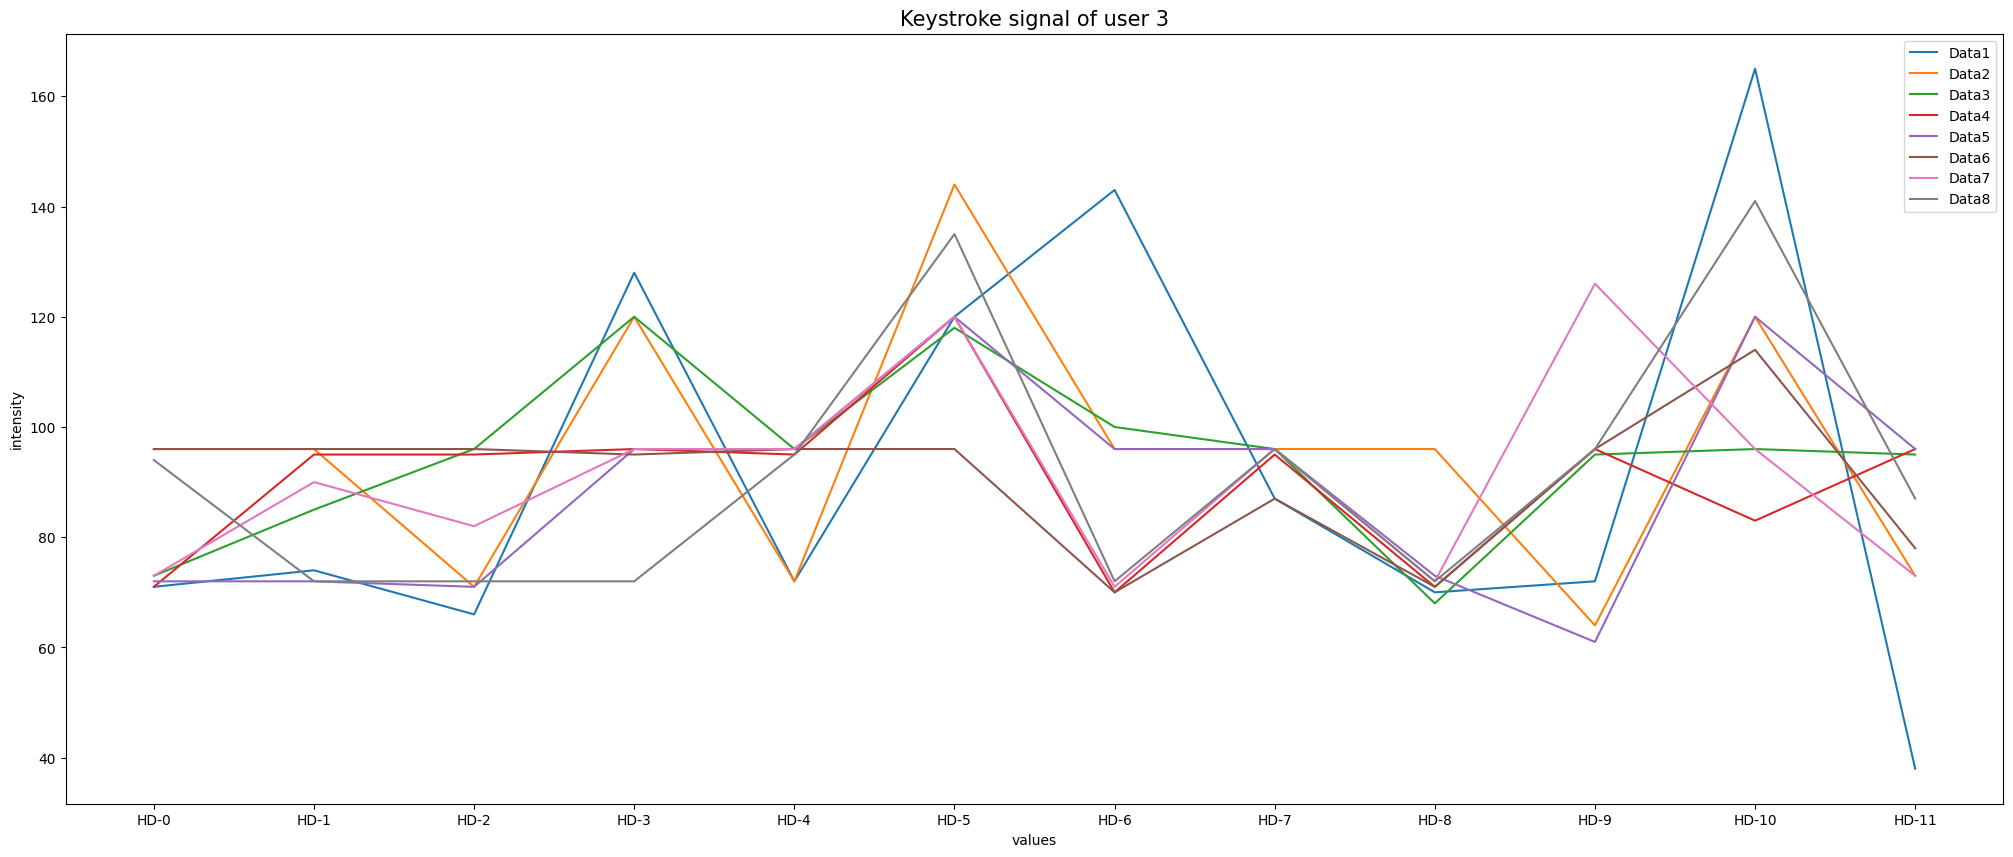

In [28]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['HD','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

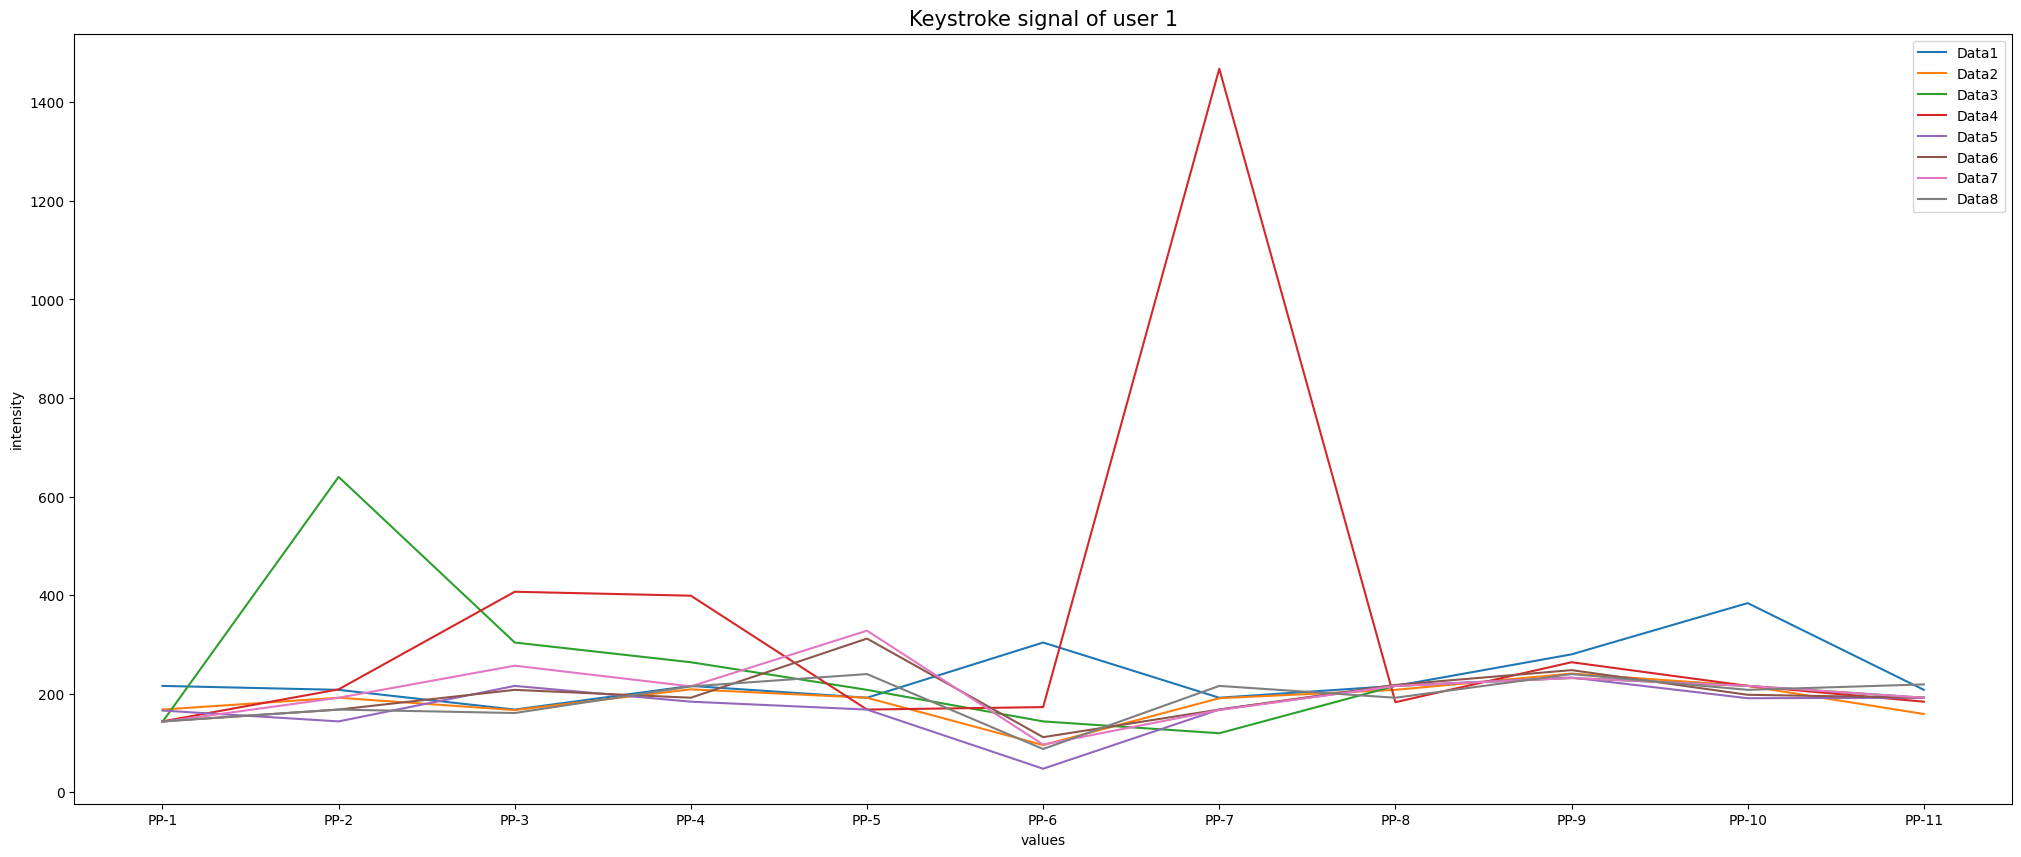

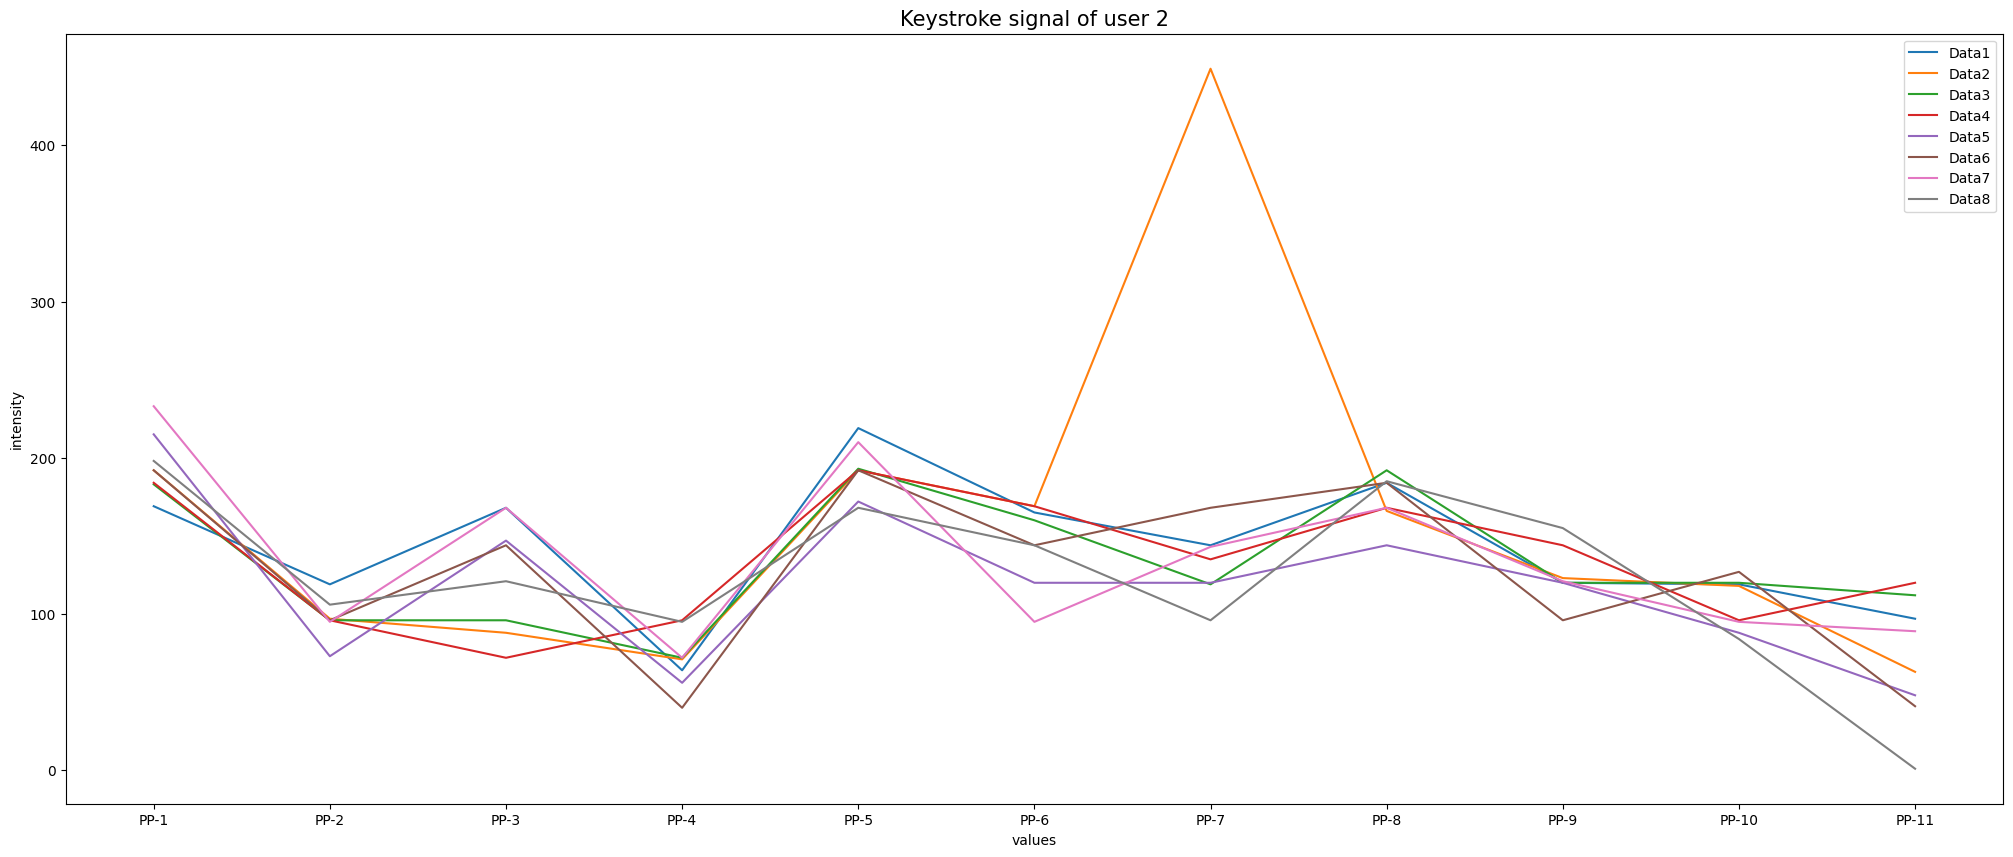

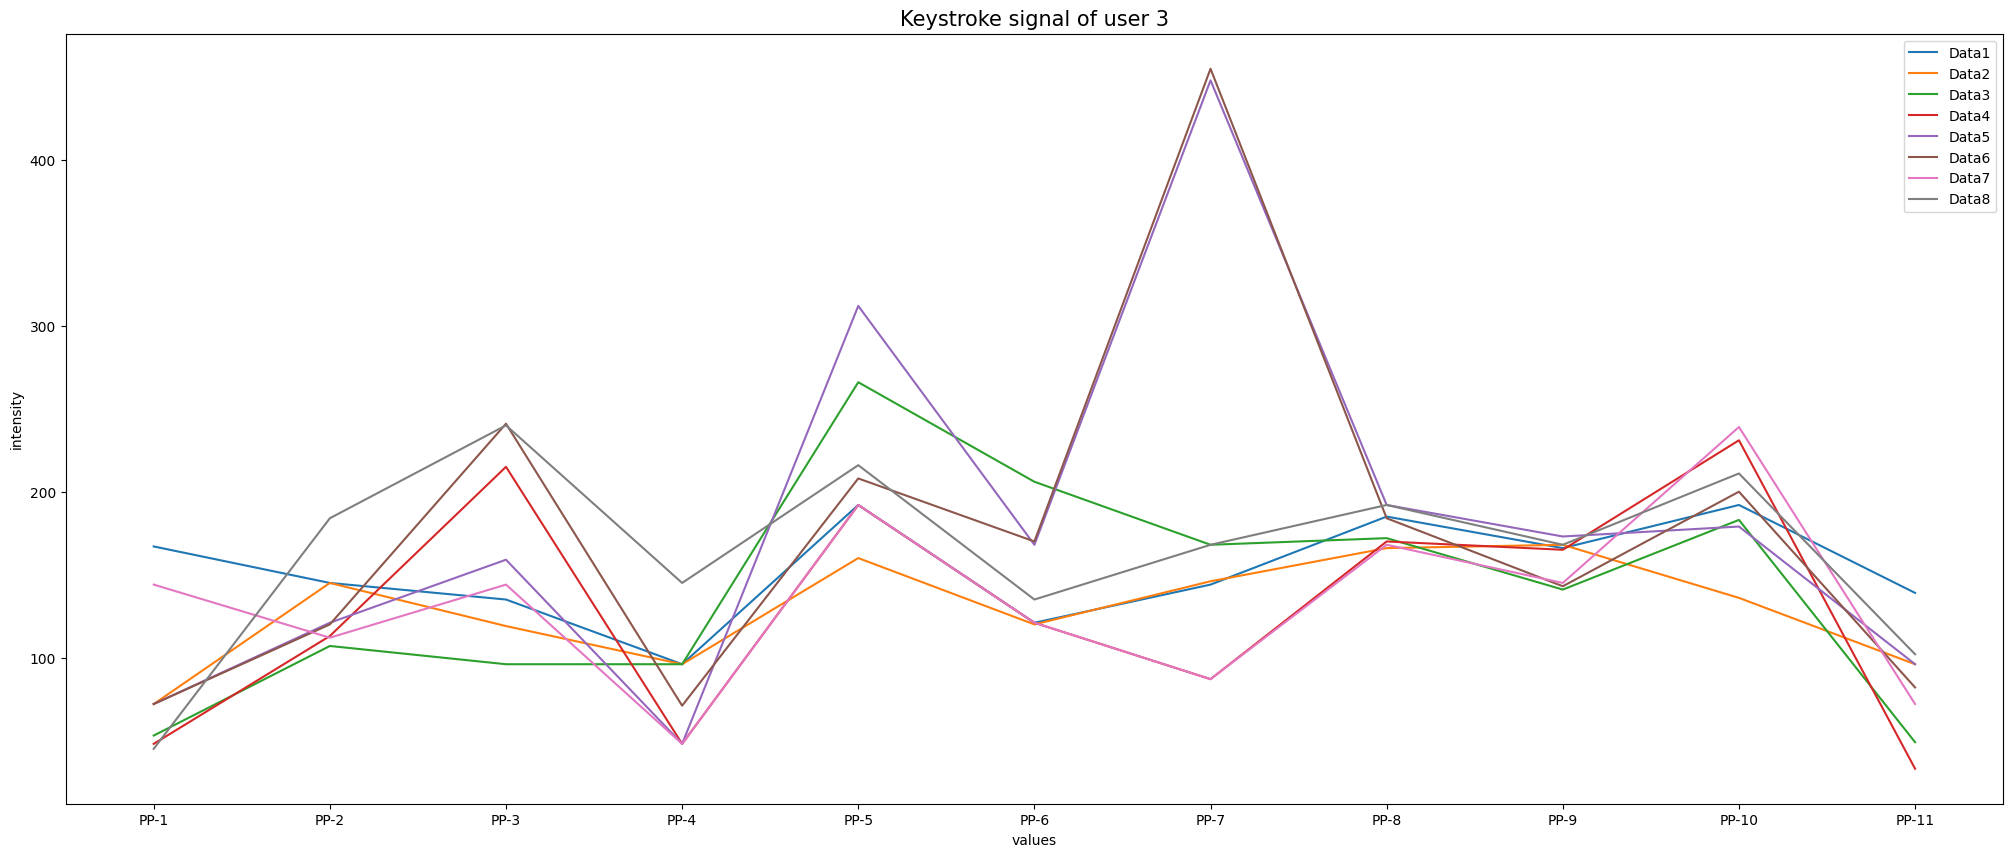

In [29]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['PP','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

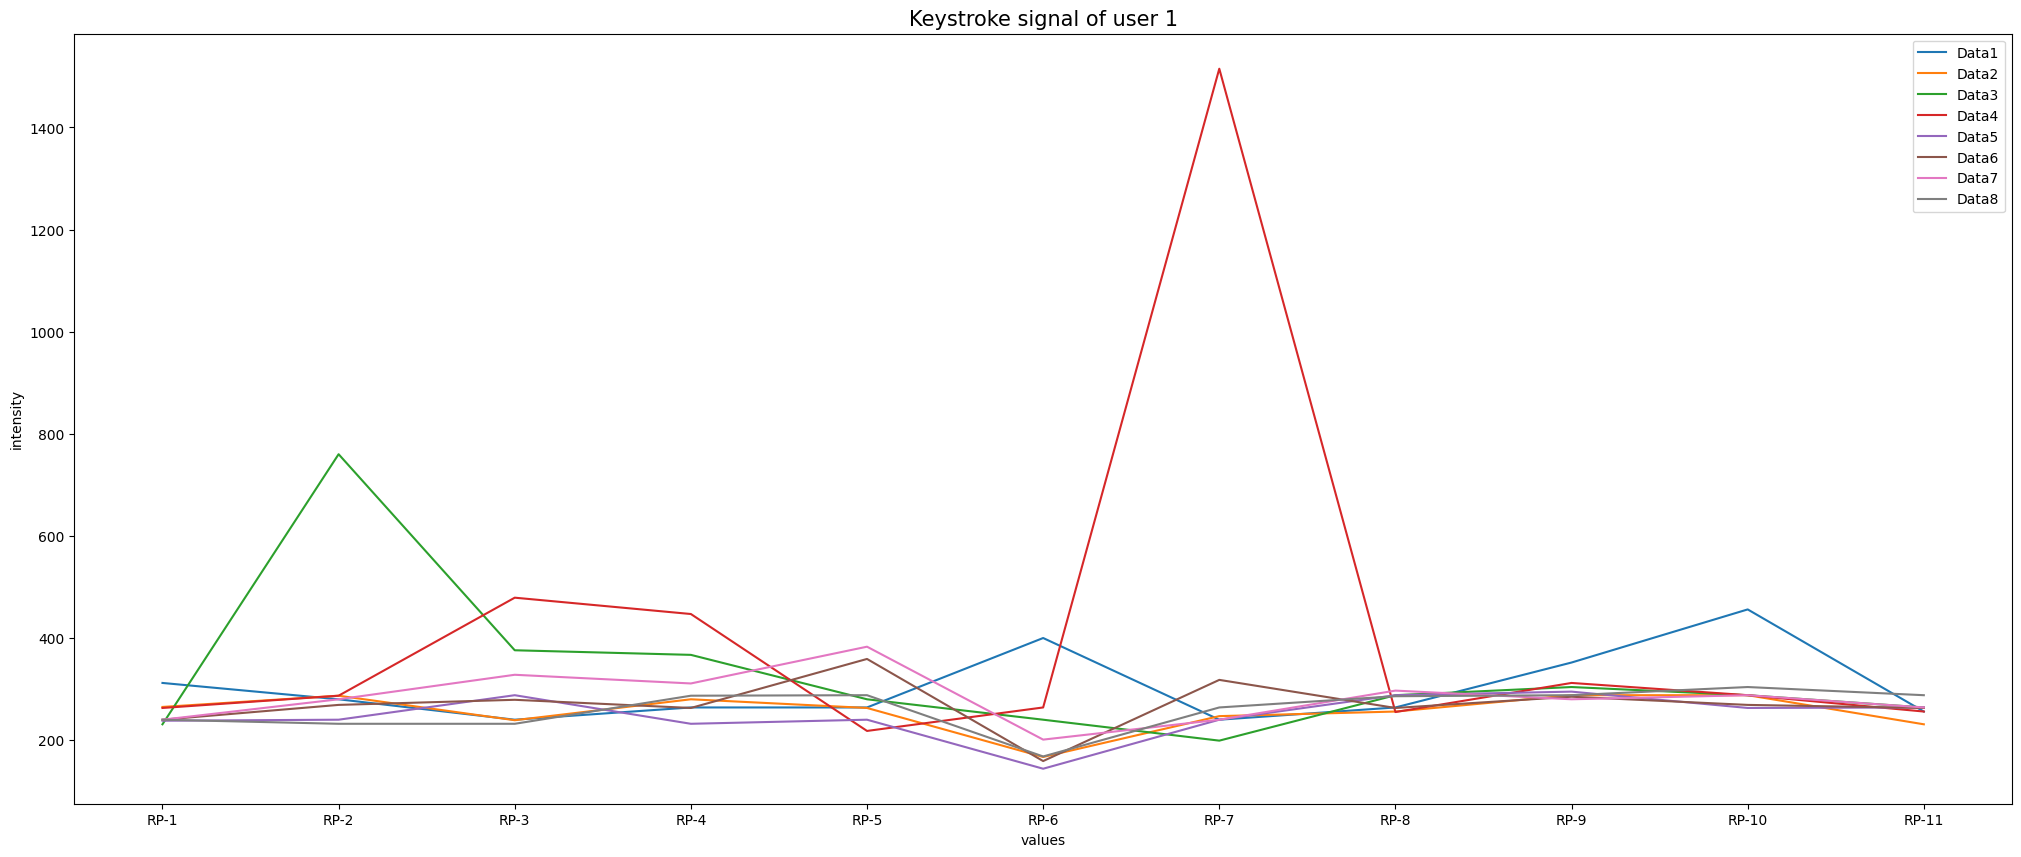

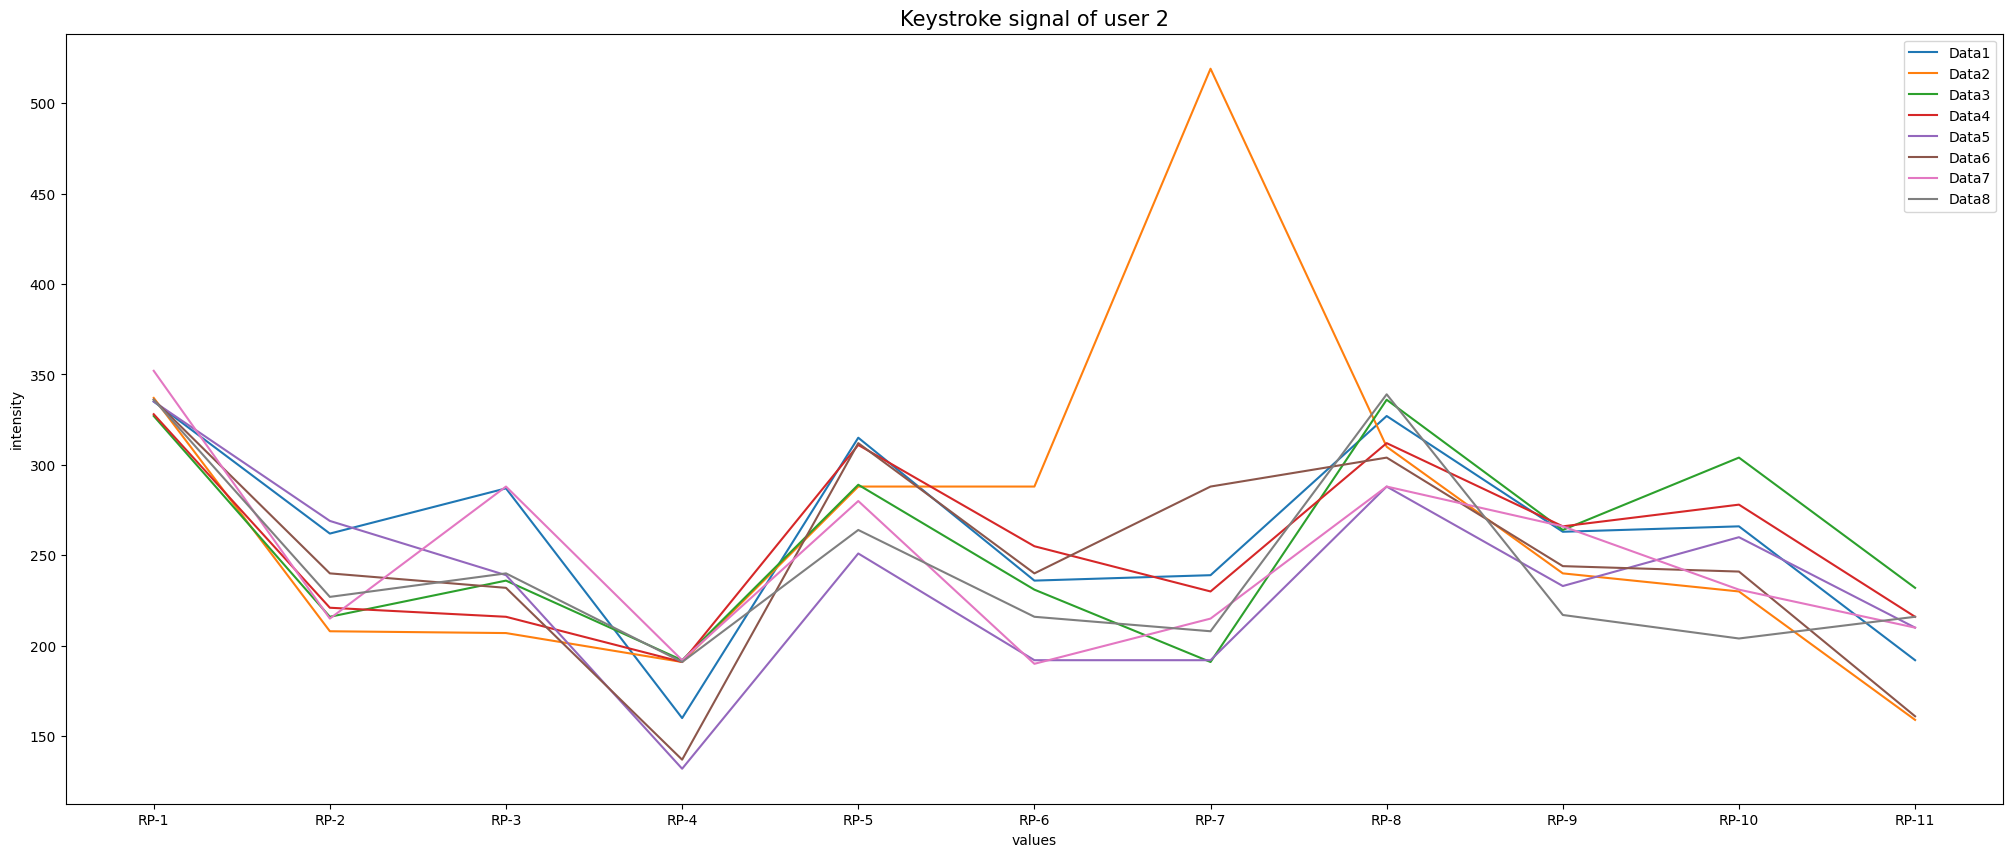

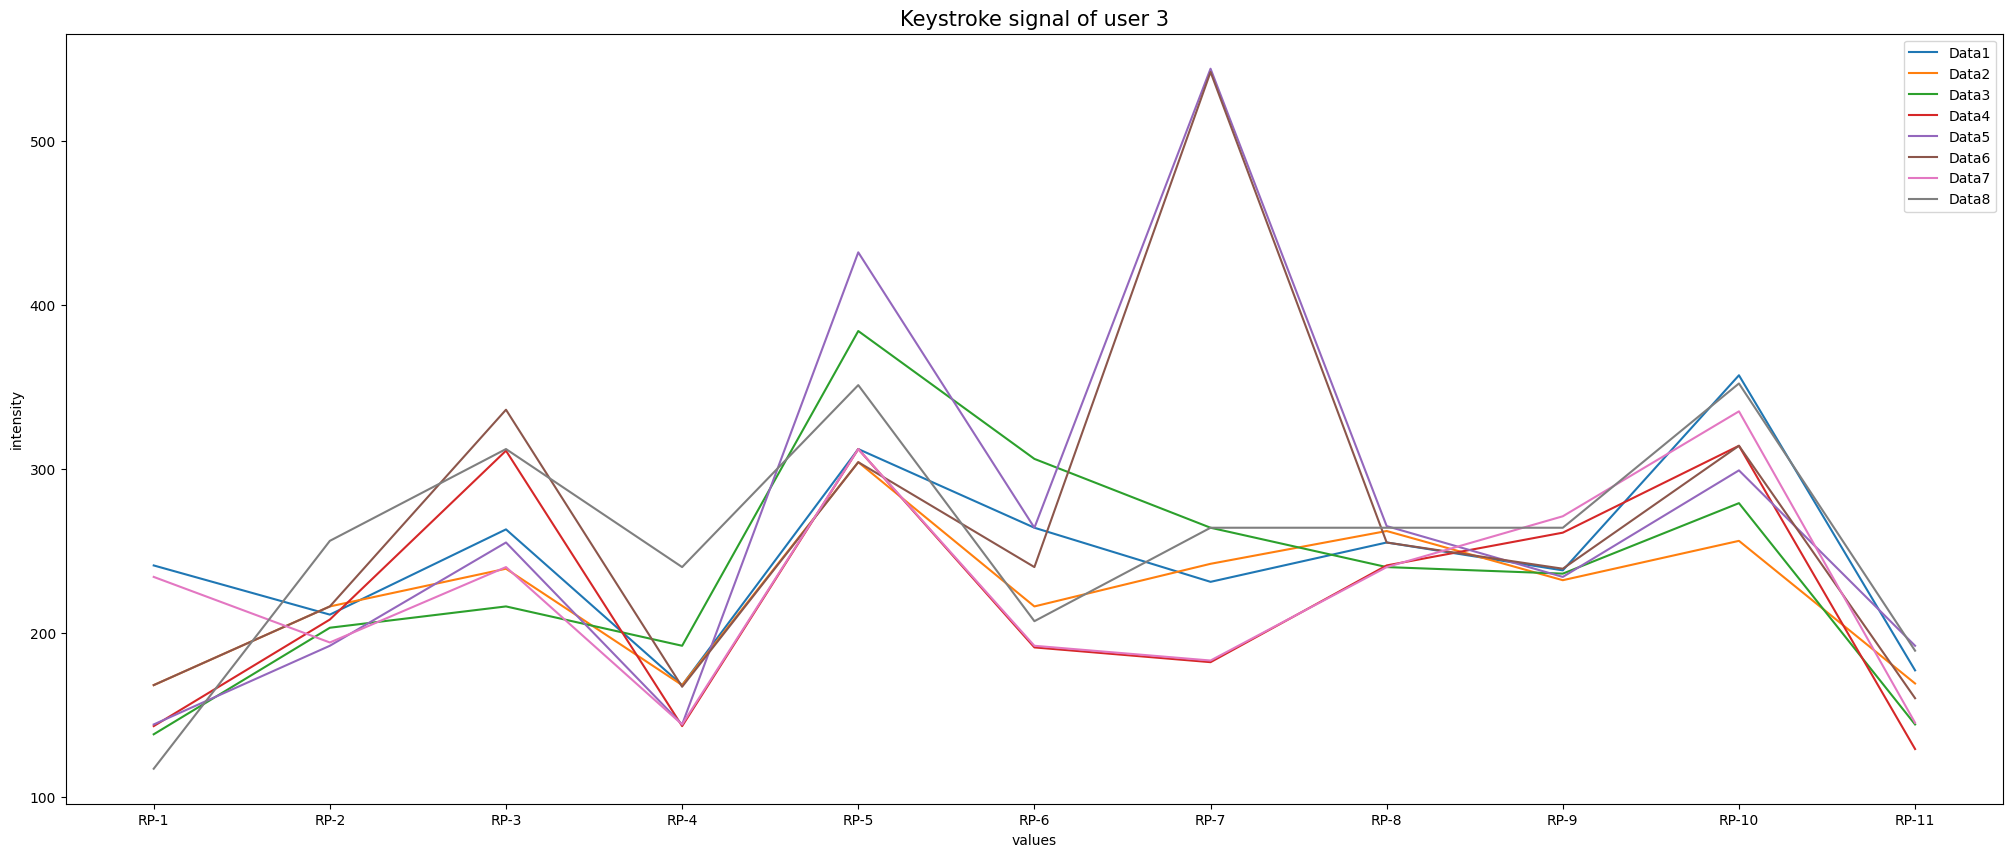

In [30]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['RP','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

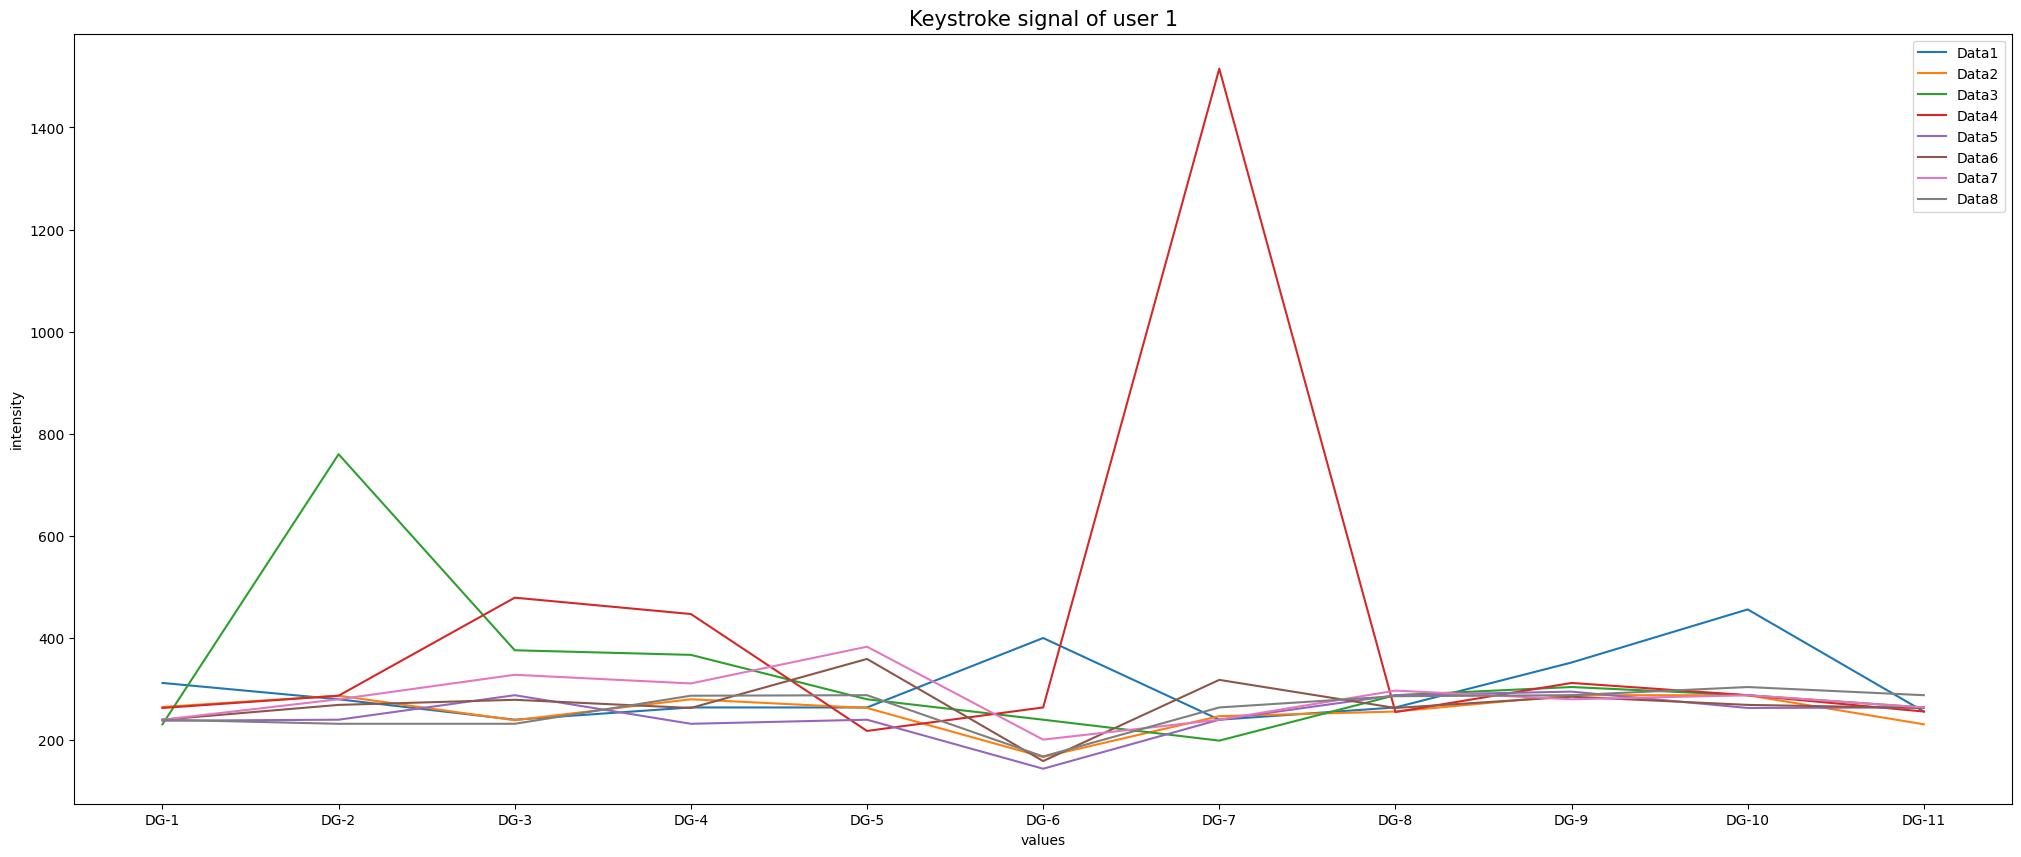

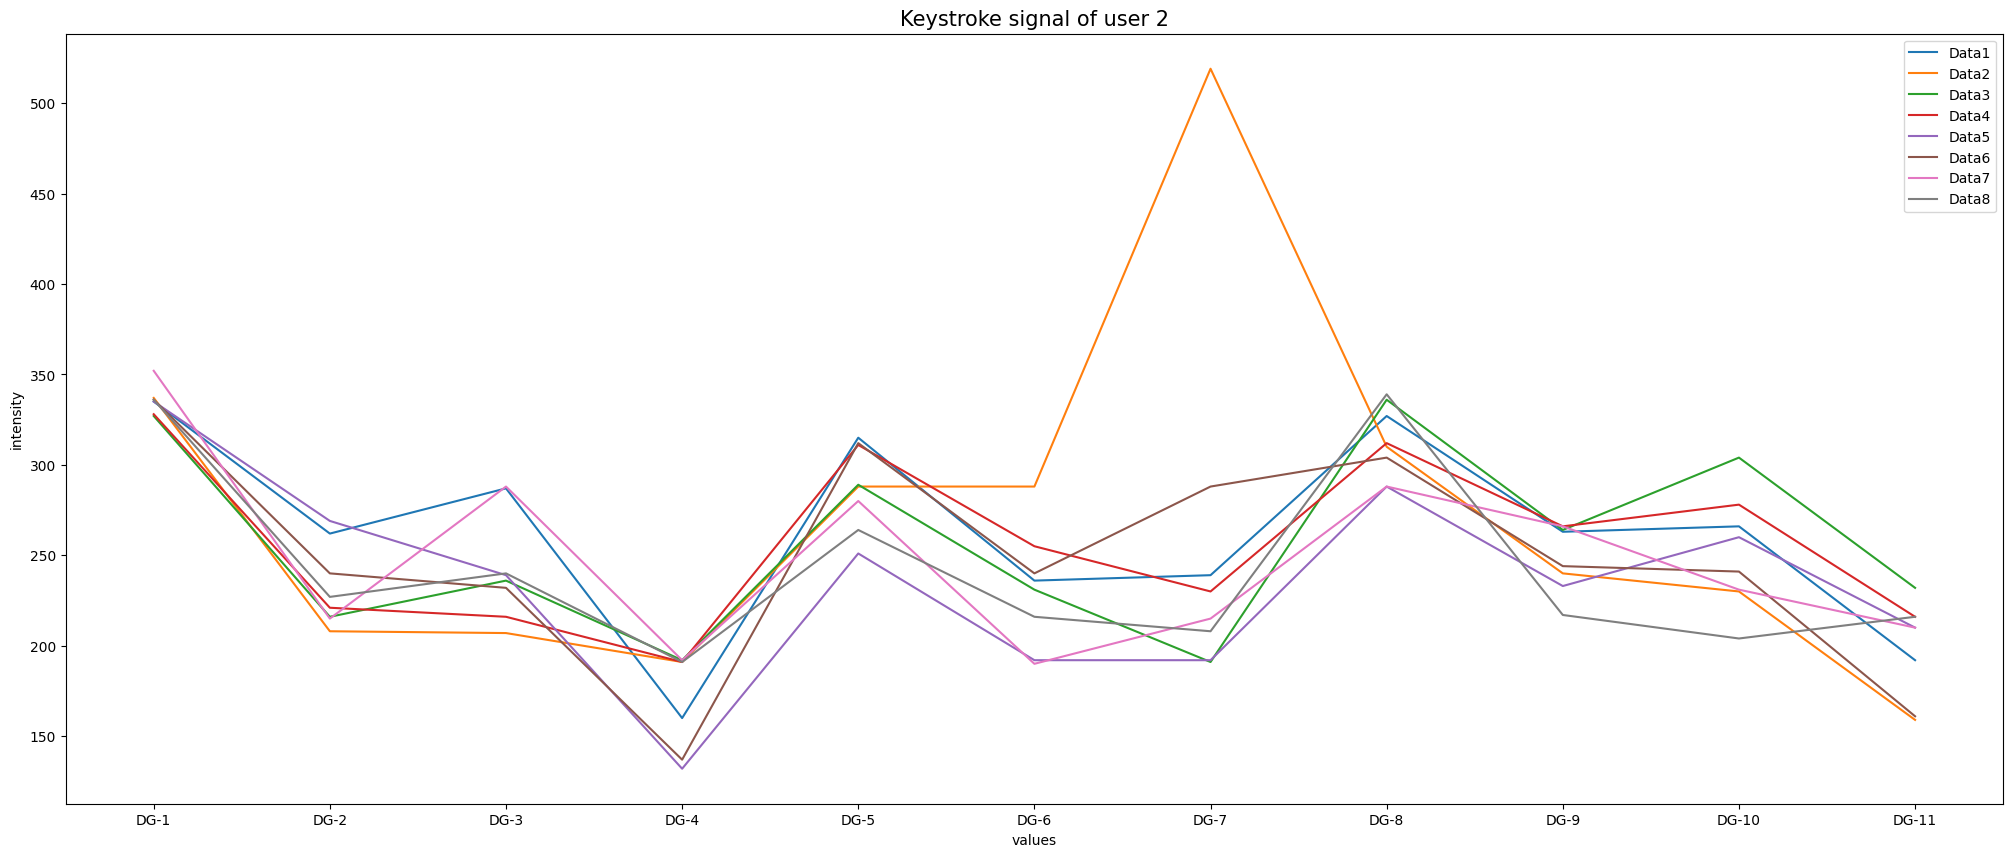

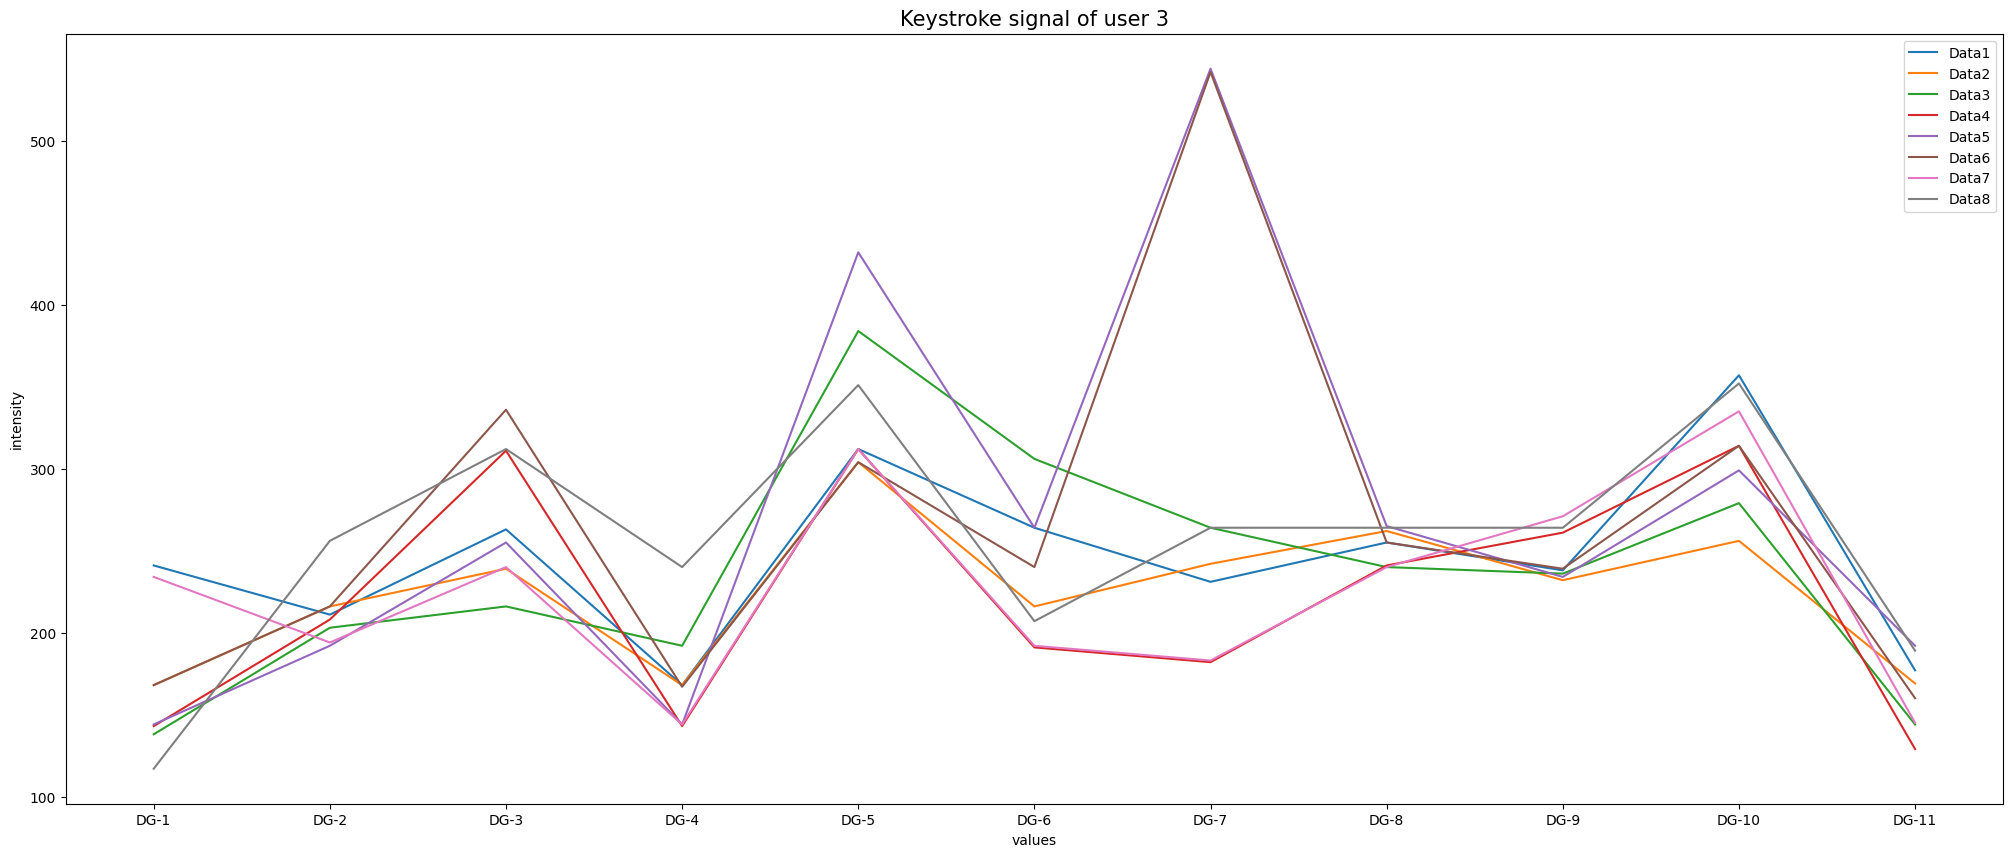

In [31]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['DG','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

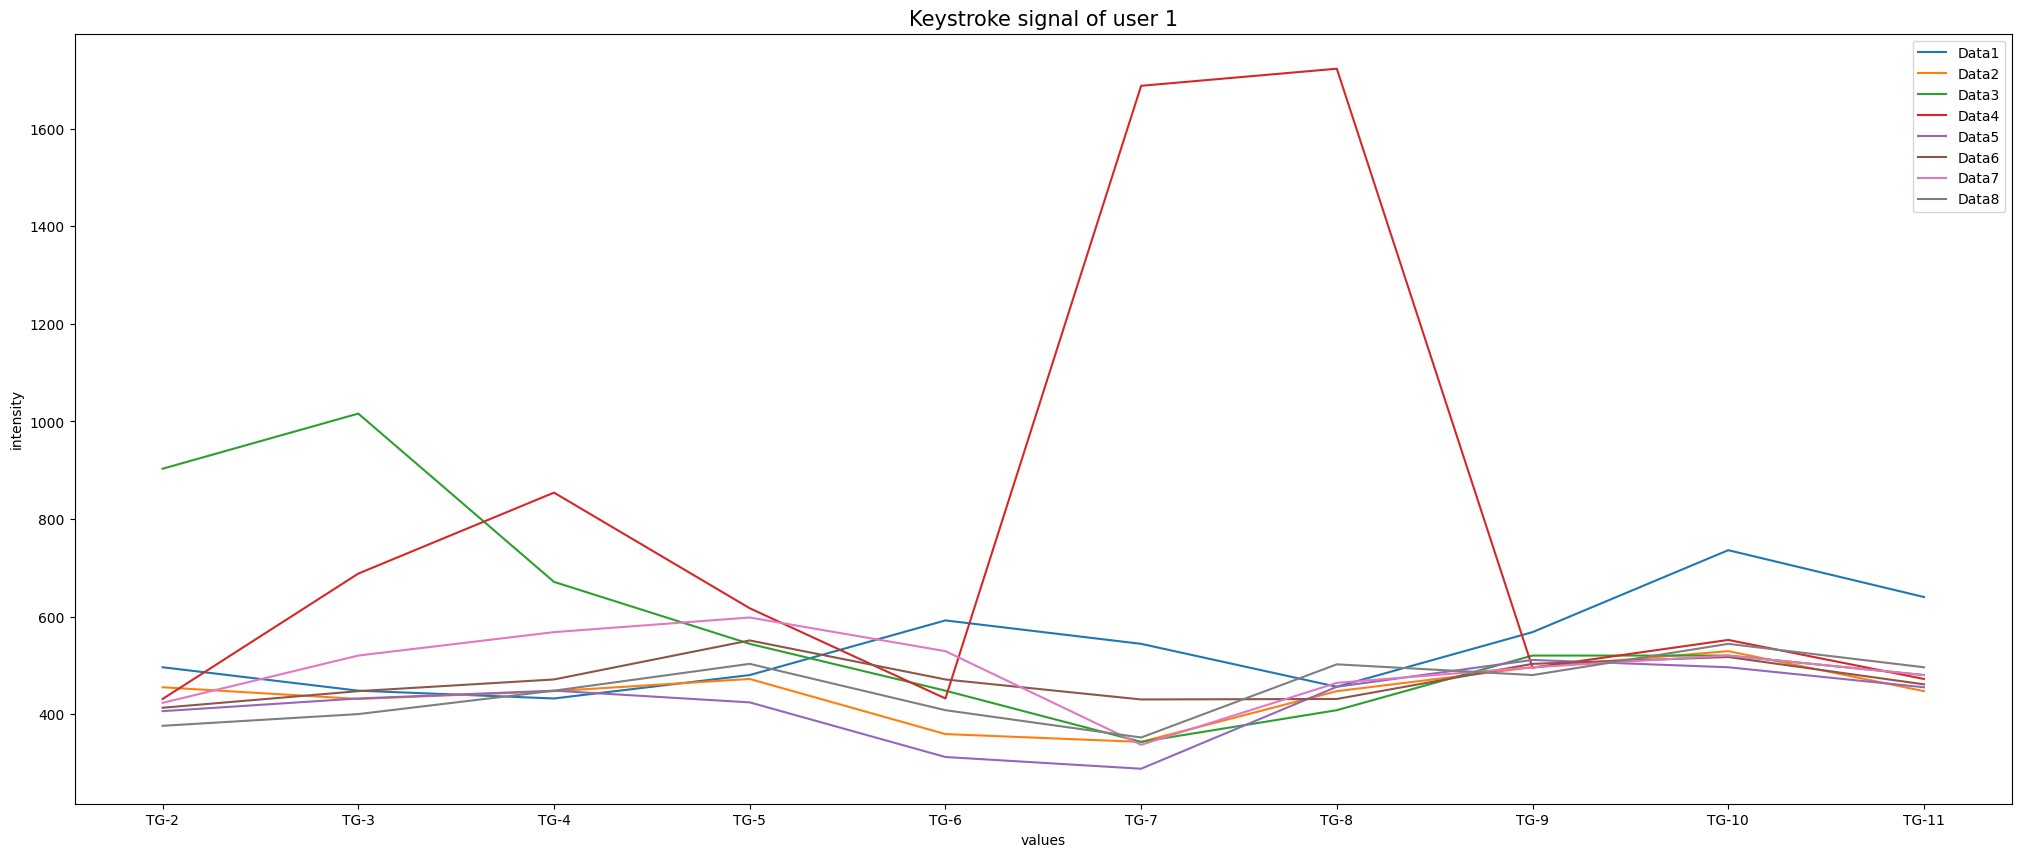

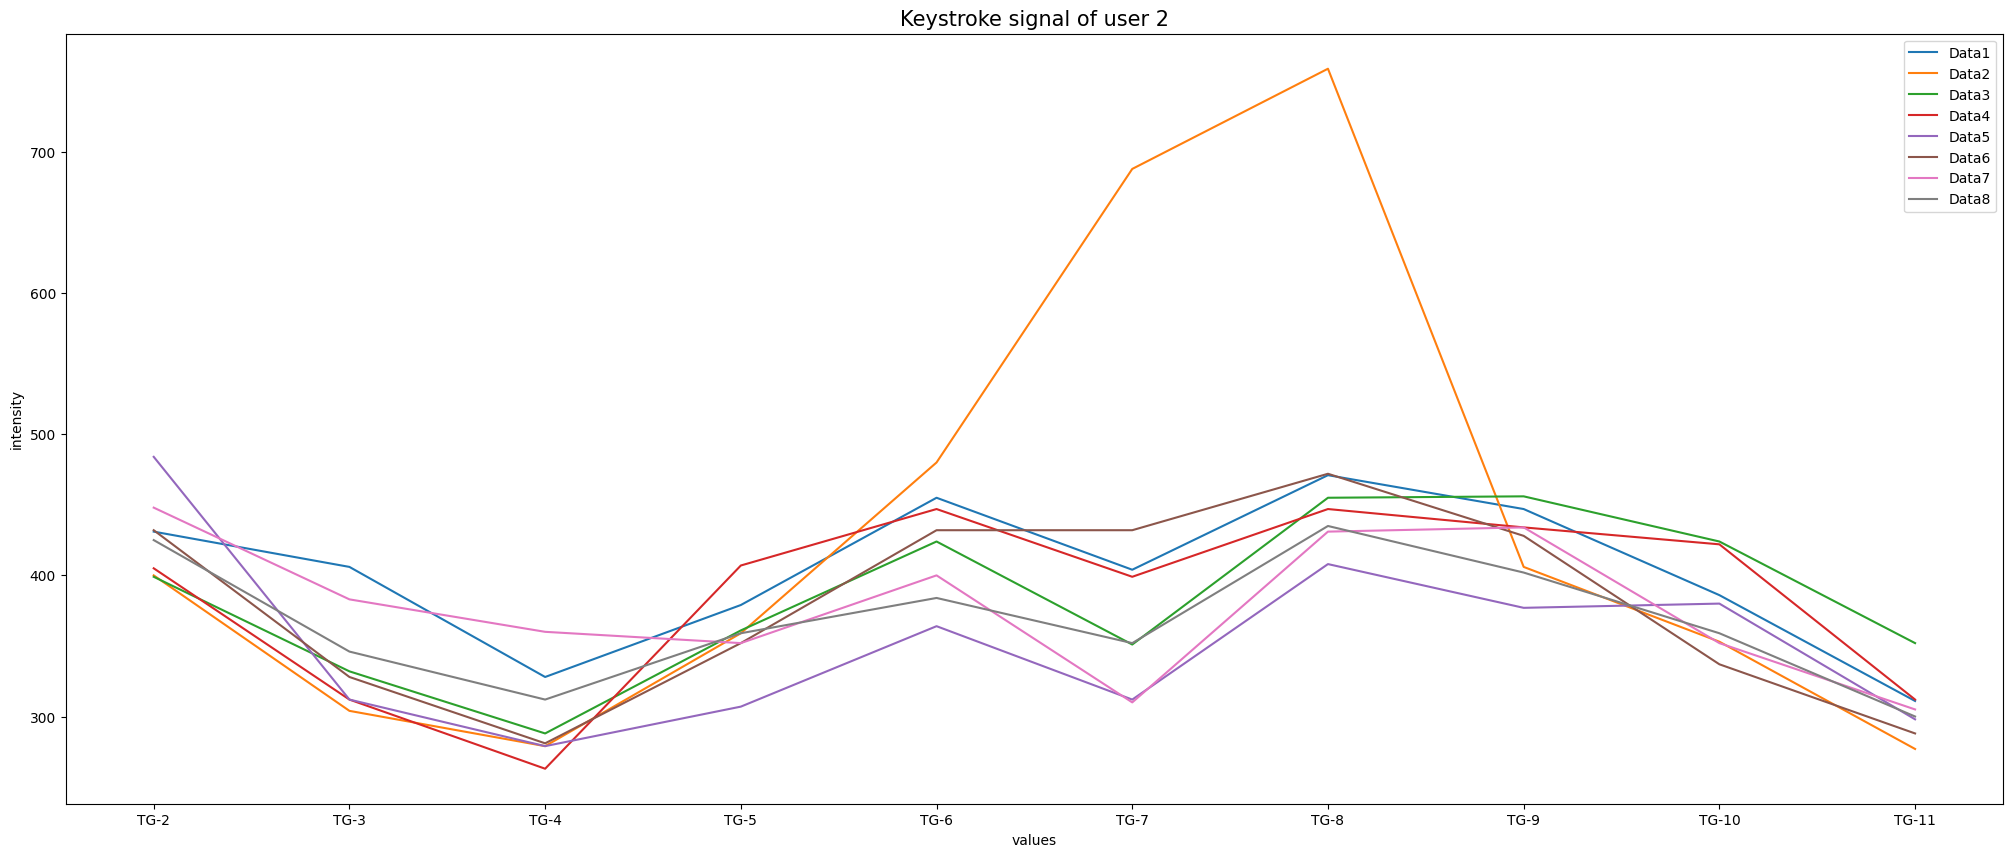

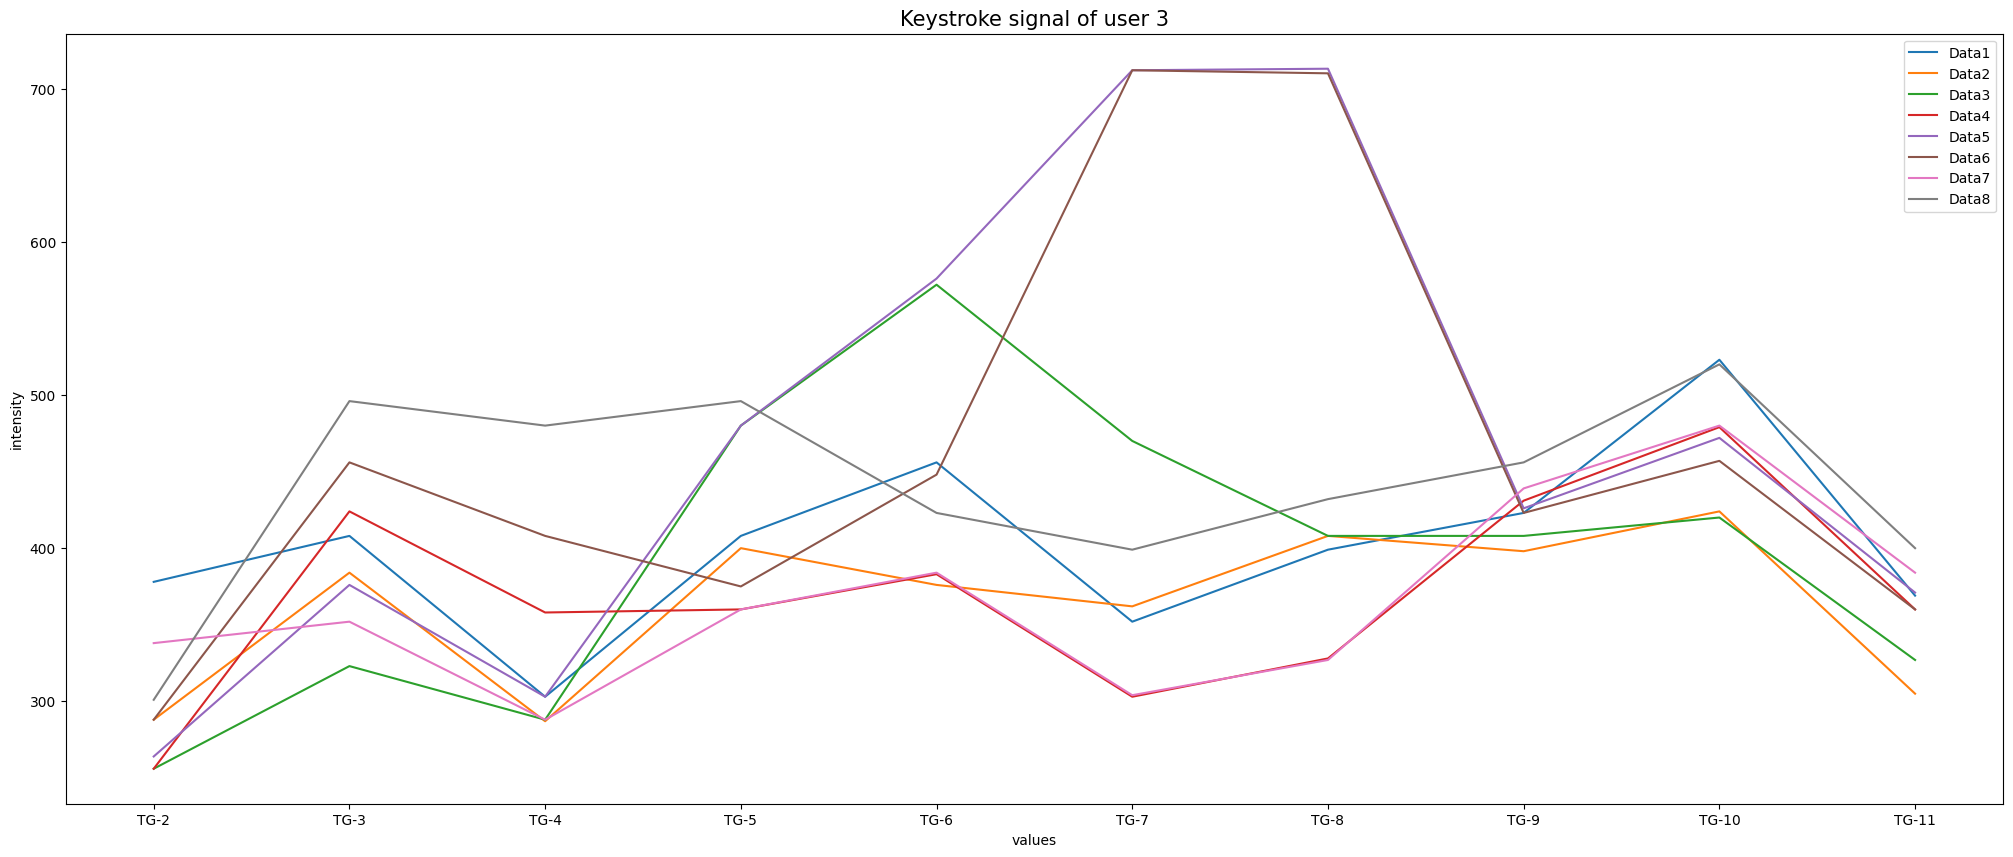

In [32]:
#def visualize_latency_signal()
cols= [col for col in visual_table.columns if len(col) <=5 and any(x in col for x in ['TG','user'])]
df_RR = visual_table[cols]

# We study the signals and see that they dont lie and we can group them based on the pattern
RR_1 = df_RR[df_RR['user'] == 1]
plot_signal(RR_1)
RR_2 = df_RR[df_RR['user'] == 2]
plot_signal(RR_2)
RR_3 = df_RR[df_RR['user'] == 3]
plot_signal(RR_3)

# Binning Visualizations
This is a visualization of the created bins that will help Aid us in explaining the concept of what is happening. 
The visualization code is based on https://www.kaggle.com/code/kartik2112/keystroke-dynamics-analysis-and-prediction-w-xgb with modifications for our code. The visualization helps us visualize the theory behind it.



In [33]:
## Training Data
drop_cols_HD_analysis = (['PP-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std']  )
trainDF_HD_analysis = keystroke_info.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

drop_cols_PPD_analysis = (['HD-'+str(i) for i in range(0,13)] + ['RP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )
trainDF_PPD_analysis = keystroke_info.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PP-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_PPD_analysis

drop_cols_RPD_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RR-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )

trainDF_RPD_analysis = keystroke_info.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RP-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RPD_analysis

drop_cols_RR_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['TG-'+str(i) for i in range(2,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0']  )

trainDF_RR_analysis = keystroke_info.drop(columns=drop_cols_RR_analysis)
trainDF_RR_analysis['id'] = trainDF_RR_analysis.index
trainDF_RR_analysis = pd.wide_to_long(trainDF_RR_analysis,['press-','RR-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_RR_analysis


drop_cols_TG_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['DG-'+str(i) for i in range(1,13)]
                          + ['RR-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0', 'press-1']  )

trainDF_TG_analysis = keystroke_info.drop(columns=drop_cols_TG_analysis)
trainDF_TG_analysis['id'] = trainDF_TG_analysis.index
trainDF_TG_analysis = pd.wide_to_long(trainDF_TG_analysis,['press-','TG-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_TG_analysis

drop_cols_DG_analysis = (['HD-'+str(i) for i in range(0,13)] + ['PP-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ["states_latency"] + ["united_latency"] +  ['TG-'+str(i) for i in range(2,13)]
                          + ['RR-'+str(i) for i in range(1,13)] + ['RP-'+str(i) for i in range(1,13)] + ["PP-mean", "PP-std", "RP-std", "RP-mean", "RR-std", "RR-mean", 'HD-mean', 'HD-std', 'press-0', 'press-1']  )

trainDF_DG_analysis = keystroke_info.drop(columns=drop_cols_DG_analysis)
trainDF_DG_analysis['id'] = trainDF_DG_analysis.index
trainDF_DG_analysis = pd.wide_to_long(trainDF_DG_analysis,['press-','DG-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_DG_analysis


trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_').join(trainDF_RR_analysis.drop(columns=['user','press-']),rsuffix='RR').join(trainDF_TG_analysis.drop(columns=['user','press-']),rsuffix='TG_').join(trainDF_DG_analysis.drop(columns=['user','press-']),rsuffix='DG_')
trainDFCombined

DG-mean     DG-std  user     TG-std     TG-mean  press-  HD-  \
id  key_no                                                                    
0   0       297.333333  70.144440     1  96.018180  530.909091       0  120   
    1       297.333333  70.144440     1  96.018180  530.909091     216   96   
    2       297.333333  70.144440     1  96.018180  530.909091     424   72   
    3       297.333333  70.144440     1  96.018180  530.909091     592   72   
    4       297.333333  70.144440     1  96.018180  530.909091     808   48   
...                ...        ...   ...        ...         ...     ...  ...   
879 8       296.583333  57.569655   110  44.506384  471.272727    1561   63   
    9       296.583333  57.569655   110  44.506384  471.272727    1679  119   
    10      296.583333  57.569655   110  44.506384  471.272727    1838  128   
    11      296.583333  57.569655   110  44.506384  471.272727    1991  105   
    12      296.583333  57.569655   110  44.506384  471.272727    2199  159   

            TG-stdRPD_  DG-meanRPD_  TG-meanRPD_  ...  TG-stdTG_  DG-meanTG_  \
id  key_no                                        ...                          
0   0              NaN          NaN          NaN  ...        NaN         NaN   
    1        96.018180   297.333333   530.909091  ...        NaN         NaN   
    2        96.018180   297.333333   530.909091  ...  96.018180  297.333333   
    3        96.018180   297.333333   530.909091  ...  96.018180  297.333333   
    4        96.018180   297.333333   530.909091  ...  96.018180  297.333333   
...                ...          ...          ...  ...        ...         ...   
879 8        44.506384   296.583333   471.272727  ...  44.506384  296.583333   
    9        44.506384   296.583333   471.272727  ...  44.506384  296.583333   
    10       44.506384   296.583333   471.272727  ...  44.506384  296.583333   
    11       44.506384   296.583333   471.272727  ...  44.506384  296.583333   
    12       44.506384   296.583333   471.272727  ...  44.506384  296.583333   

            TG-meanTG_  DG-stdTG_    TG-  TG-stdDG_  DG-meanDG_  TG-meanDG_  \
id  key_no                                                                    
0   0              NaN        NaN    NaN        NaN         NaN         NaN   
    1              NaN        NaN    NaN  96.018180  297.333333  530.909091   
    2       530.909091  70.144440  496.0  96.018180  297.333333  530.909091   
    3       530.909091  70.144440  448.0  96.018180  297.333333  530.909091   
    4       530.909091  70.144440  432.0  96.018180  297.333333  530.909091   
...                ...        ...    ...        ...         ...         ...   
879 8       471.272727  57.569655  466.0  44.506384  296.583333  471.272727   
    9       471.272727  57.569655  453.0  44.506384  296.583333  471.272727   
    10      471.272727  57.569655  405.0  44.506384  296.583333  471.272727   
    11      471.272727  57.569655  417.0  44.506384  296.583333  471.272727   
    12      471.272727  57.569655  520.0  44.506384  296.583333  471.272727   

            DG-stdDG_    DG-  
id  key_no                    
0   0             NaN    NaN  
    1       70.144440  312.0  
    2       70.144440  280.0  
    3       70.144440  240.0  
    4       70.144440  264.0  
...               ...    ...  
879 8       57.569655  279.0  
    9       57.569655  237.0  
    10      57.569655  287.0  
    11      57.569655  258.0  
    12      57.569655  367.0  

[11440 rows x 32 columns]

# Histograms
Thes histograms help to exemplify how we will transform our data into binned data. We do this by assigning a bin number to the data rather than an actual timing number. These latency histograms help show how that works.

<ipython-input-34-a6a0793c3113>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
<ipython-input-34-a6a0793c3113>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['PP-']).set_title('Hist of Press-Press Duration')
<ipython-

Text(0.5, 1.0, 'Hist of Release-Release Duration')

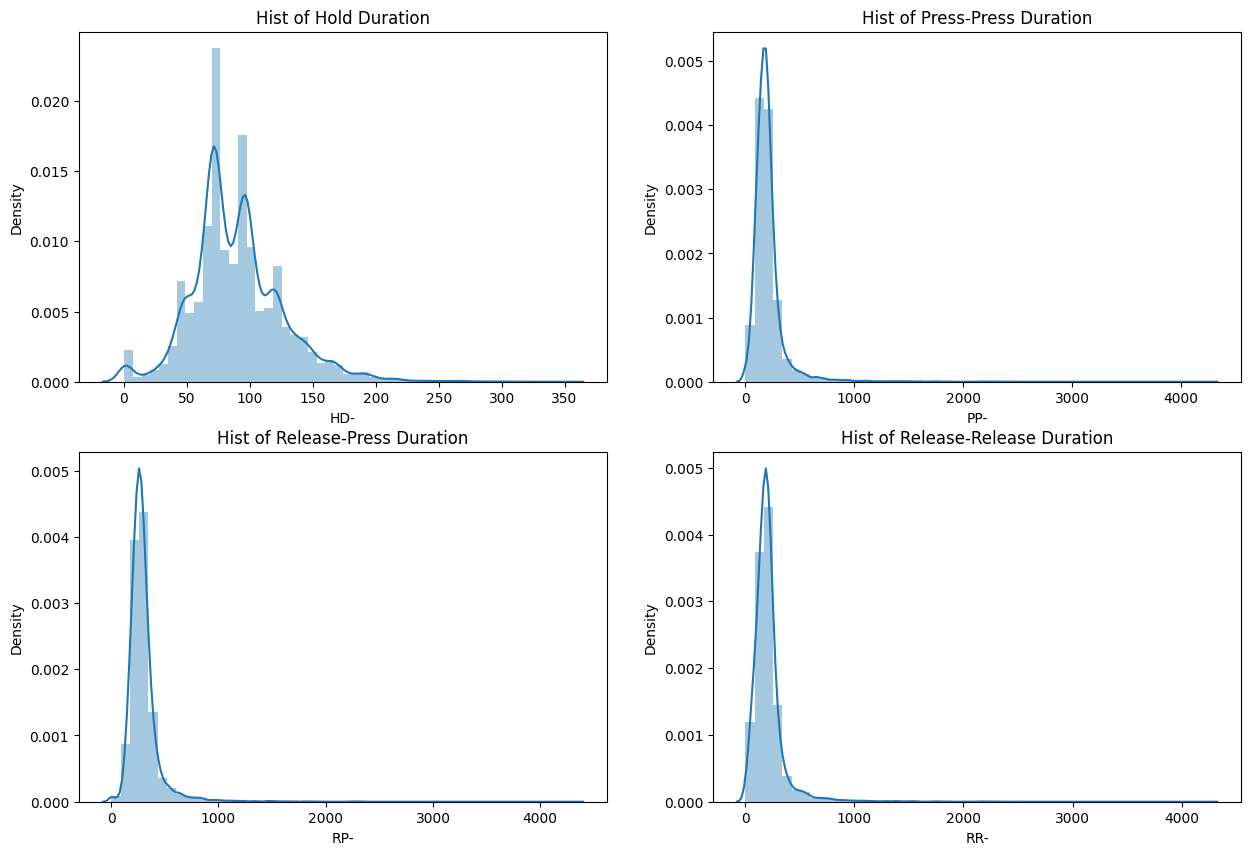

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
plt.subplot(2,2,2)

sns.distplot(trainDFCombined['PP-']).set_title('Hist of Press-Press Duration')
plt.subplot(2,2,3)
sns.distplot(trainDFCombined['RP-']).set_title('Hist of Release-Press Duration')
plt.subplot(2,2,4)
sns.distplot(trainDFCombined['RR-']).set_title('Hist of Release-Release Duration')


<ipython-input-35-7814ce9355ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['TG-']).set_title('Hist of Trigraph Duration')
<ipython-input-35-7814ce9355ed>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['DG-']).set_title('Hist of Digraph Duration')


Text(0.5, 1.0, 'Hist of Digraph Duration')

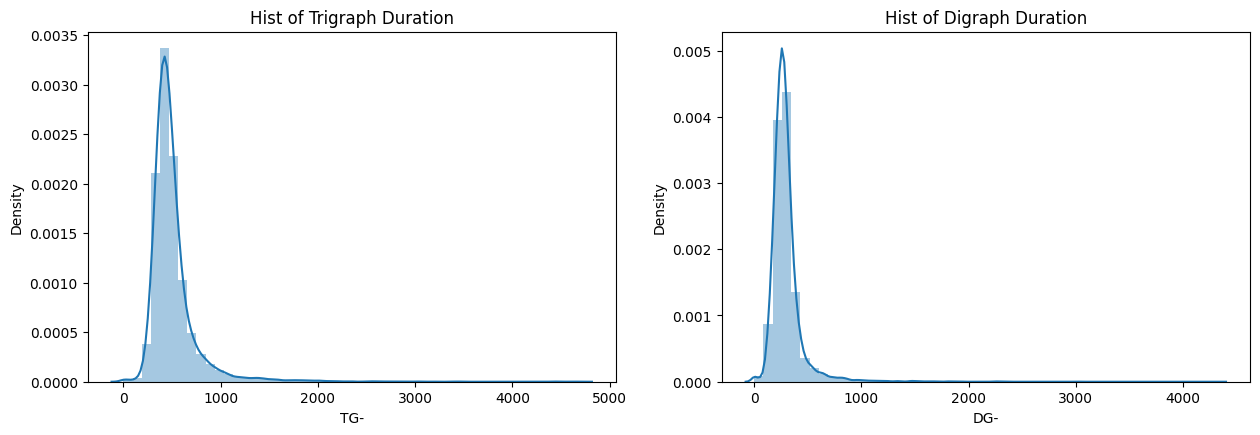

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(trainDFCombined['TG-']).set_title('Hist of Trigraph Duration')
plt.subplot(2,2,2)
sns.distplot(trainDFCombined['DG-']).set_title('Hist of Digraph Duration')

In [36]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPMax = trainDFCombined['RP-'].max()
PPMax = trainDFCombined['PP-'].max()
RRMax = trainDFCombined['RR-'].max()
TGMax = trainDFCombined['TG-'].max()
DGMax = trainDFCombined['DG-'].max()



print('Max values in train are: HDMax:',HDMax,'RPMax:',RPMax,'PPMax:',PPMax, "RRMAX:", RRMax, "TGMAX:", TGMax, "DGMAX:", DGMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPEnc'],RPDBins = pd.qcut(trainDFCombined['PP-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPEnc'],PPDBins = pd.qcut(trainDFCombined['RP-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RREnc'],RRBins = pd.qcut(trainDFCombined['RR-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['TGEnc'],TGBins = pd.qcut(trainDFCombined['TG-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['DGEnc'],TGBins = pd.qcut(trainDFCombined['DG-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['DGEnc'],TGBins = pd.qcut(trainDFCombined['DG-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPEnc'] = trainDFCombined['PPEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPEnc'] = trainDFCombined['RPEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RREnc'] = trainDFCombined['RREnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['TGEnc'] = trainDFCombined['TGEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['DGEnc'] = trainDFCombined['DGEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 348 RPMax: 4322.0 PPMax: 4255.0 RRMAX: 4249.0 TGMAX: 4695.0 DGMAX: 4322.0


<ipython-input-37-4cc967736632>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-37-4cc967736632>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y='PPEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-press duration')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3

Text(0.5, 1.0, 'Swarm plot of binned release-press duration')

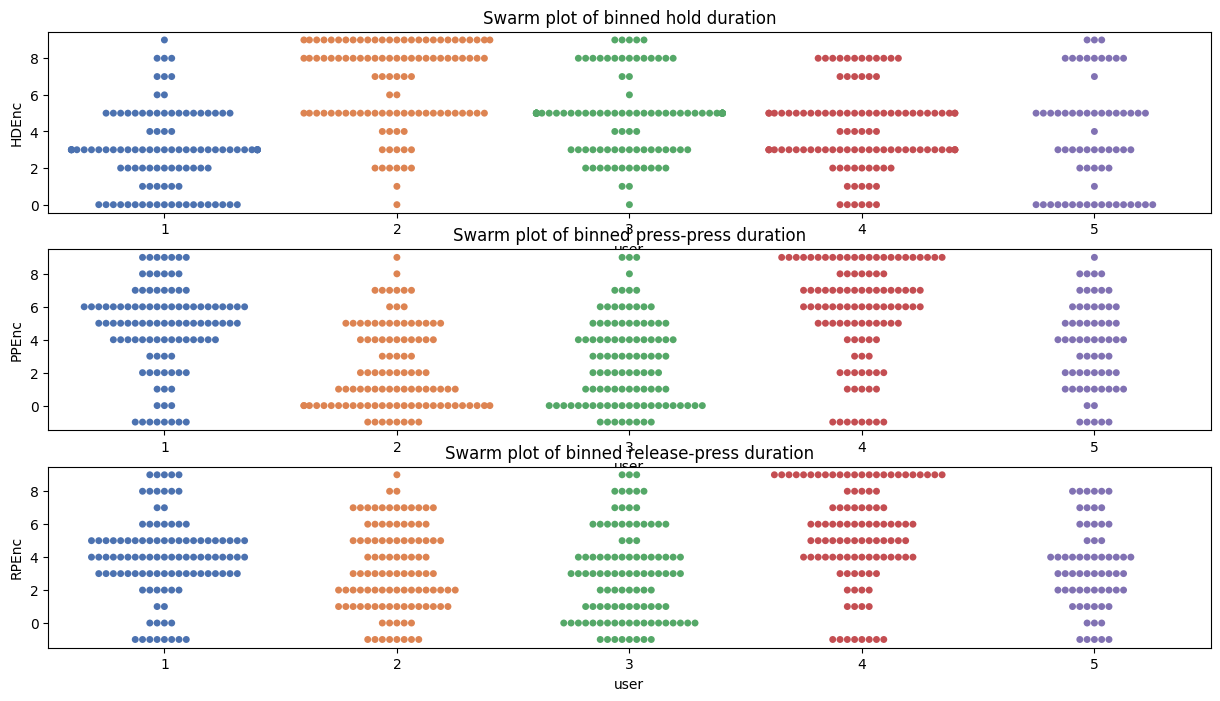

In [37]:
plt.figure(figsize=(15,8))
noOfUsers = 5
plt.subplot(3,1,1)
sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
plt.subplot(3,1,2)
sns.swarmplot(y='PPEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-press duration')
plt.subplot(3,1,3)
sns.swarmplot(y='RPEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-press duration')

<ipython-input-38-80af0b52fb72>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y='TGEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned Trigtaph latency')
<ipython-input-38-80af0b52fb72>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y='RREnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-release duration')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-38-80af0b52fb72>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(y='DGEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-release duration')
/usr/local/lib/python3.

Text(0.5, 1.0, 'Swarm plot of binned release-release duration')

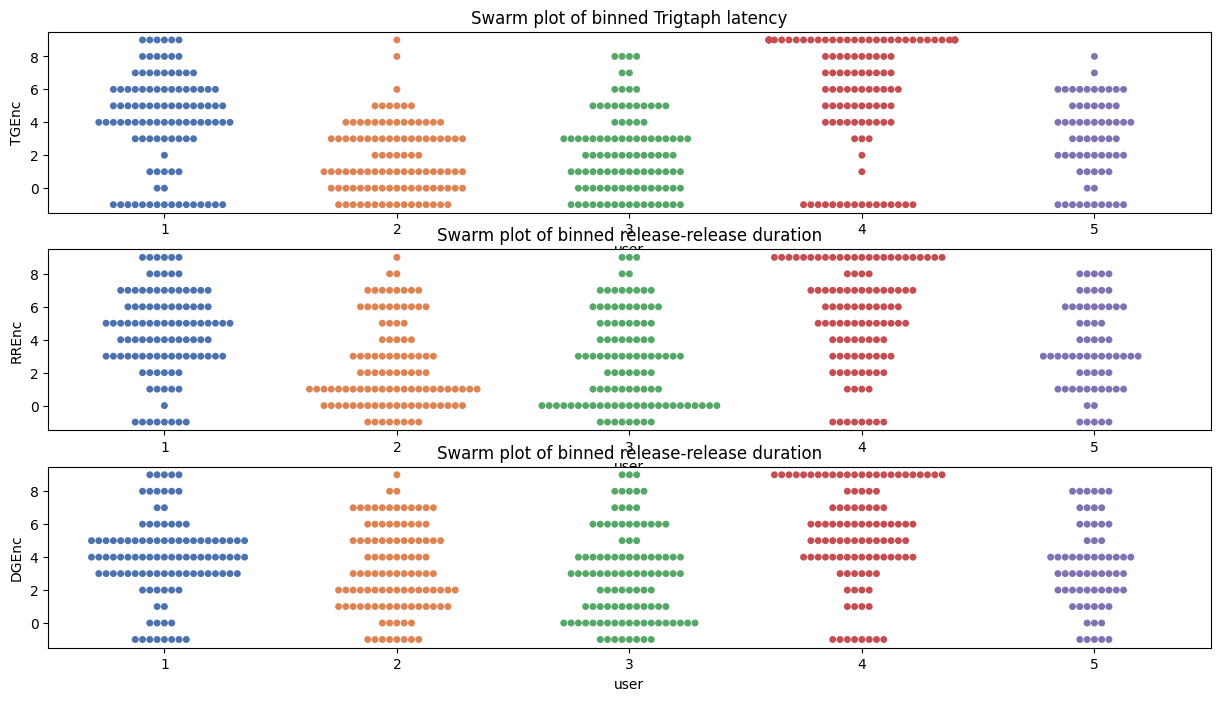

In [38]:
plt.figure(figsize=(15,8))
noOfUsers = 5
plt.subplot(3,1,1)
sns.swarmplot(y='TGEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned Trigtaph latency')
plt.subplot(3,1,2)
sns.swarmplot(y='RREnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-release duration')
plt.subplot(3,1,3)
sns.swarmplot(y='DGEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-release duration')
 